# End-to-end machine learning project



# Setup

In [12]:
# to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# common imports
import numpy as np
import os

# set initial seed
np.random.seed(42)

# setup matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", "CHAPTER_ID")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore useless warnings (see SciPy issue #5998)
#import warnings
#warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [13]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("finished")

In [3]:
# download data (run only once)
if False:
    fetch_housing_data()

In case you are wondering, the dataset is saved in `datasets/housing/housing.csv` and has this format

```
longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
```


In [14]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [15]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

Summary of the dataset:

- There are 20,640 instances in the dataset.
- The `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 values are missing.
- There are 10 attributes: 9 numerical and 1 categorical (`ocean_proximity`). 
- The `ocean_proximity` attribute has five categories: `<1H OCEAN`, `INLAND`, `NEAR OCEAN`, `NEAR BAY`, `ISLAND`.


In [11]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Note** You can use `style.format()` to control the format of the outout. Useful examples:

[source](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [16]:
housing.describe().style.format("{:10.4f}")

- Note that the `count` of `total_bedrooms` is 20,433, not 20640. This is becasue null values are ignored.
- The `std` row shows the standard deviation ($\sigma$), which measures how dispersed the values are. It is the square of the variance, which is the average of the squared deviation from the mean. When a feature has a bell-shaped normal distribution (also called a Gaussian distribution), the 68-95-99.7 rule applies: about 68% of the values fall within 1$\sigma$ of the mean, 95% within 2$\sigma$, and 99.7% within 3$\sigma$. 
- The 25%, 50%, and 75% rows show the corresponding *percentiles*: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a `house_median_age` lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25-th percentile (1-st quartile), the median, and the 75-th percentile (3-rd quartile).


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A **histogram** shows the number of instances (vertical axis) that have a given value range (horizontal axis). 


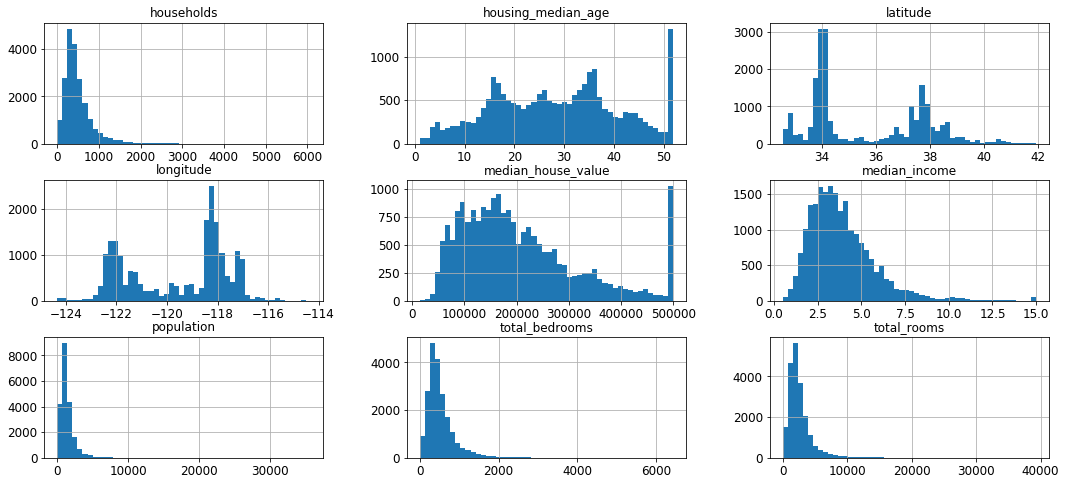

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(18, 8))
plt.show()

Notice a few things in these histograms:

1. The `median_income` and `median_house_value` attributes represents amounts of money (I think). However, they ranges differ. From the book: The data (`median_income` attribute) has been **scaled** and **capped** at 15.0001 for higher median incomes and 0.4999 for lower median incomes (you can verify this by using `housing.describe()` as above). These numbers represent roughly tens of thousands of dollars (e.g., 3 actually means 30,000). **Working with preprocessed attributes is common in Machine Learning and it is not necessarily a problem, but you should  try to understand how the data was computed**.

2. The `housing_median_age` and `median_house_value` (this is the value we try to predict) were also capped at 52 and 500001, respectively. This is a problem, since we are trying to predict the value of `median_house_value`. Our machine learning algorithm may learn that the prices never go beyond that limit. You can do one of the following things:
    - Collect proper labels for the districts (instances) whose labels were capped.
    - Remove those districts (instances) from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond 500001).
    
- These attributes have very different scales. We will discuss this later (feature scaling).
- Many histograms are **tail heavy**: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. We will try transforming these attributes later to have a more bell-shaped distributions.

# Create a test set

In [16]:
# first approach: random
import numpy as np

np.random.seed(42)

def split_train_test(data, test_ratio):
    """Splits data into train and test sets"""
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]   # note, here we can use either .loc or .iloc because we use lists as inputs

In [17]:
# second approach: sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

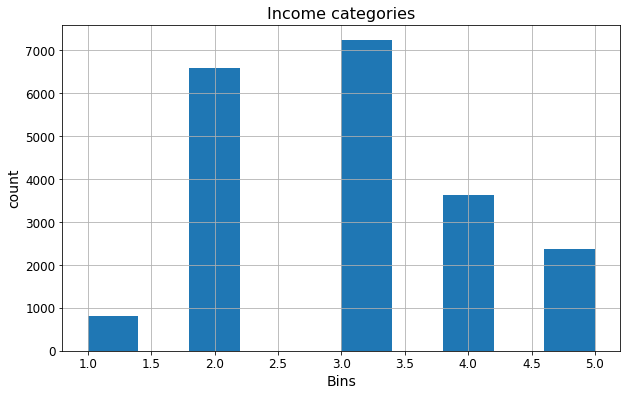

In [18]:
# add variable to create five categories based on "median_income"
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1,2,3,4,5])

# create histogram
ax = housing["income_cat"].hist(figsize=(10, 6));
ax.set_title("Income categories", size=16);
ax.set_xlabel("Bins")
ax.set_ylabel("count");

**How to interpret the histogram?** There are five bins; each bin represents a range for the `median_income` attribute. Remember, `housing["median_income"]` contains values in `[0.499900, 15.0001]`, and the values are scaled, meaning that `housing["median_income"] = 3` is $30,000, see page 48. The ranges of the bins are:

- Bin 1: [0.0, 1.5], count: 822
- Bin 2: [1.5, 3.0], count: 6581
- Bin 3: [3.0, 4.5], count: 7236
- Bin 4: [4.5, 6.0], count: 3639
- Bin 5: [6.0, inf], count: 2362

In [29]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

From the histogram, we can see that bin 3 contains 7,236 instances. That means that 7,236 persons have a median income in the range [3, 4.5], that is, 30,000 to 45,000 USD. After creating the bins, we are now ready to do stratified sampling based on the income category. 

In [20]:
# third approach: stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, 
                              test_size=0.2,
                              random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**How did we create the stratified sampled sets** Notice that we first create a new variable called `income_cat`. This variable is relevant for predicting the median housing price and is employed to create five categories from `median_income`. From these five categories, we can determine the proportion among categories (ie, how many instances are in each category). The stratified sampling is done using `split.split(housing, housing["income_cat"])`, where `housing["income_cat"]` determines the proportions of the categories. I think the author follow this approach since this is a regression problem. If it were a classification problem, then the labels should be employed for the stratified sampling like this `split.split(housing, housing["labels"])`. You can confirm this on the example of `StratifiedShuffleSplit` in [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

**Note about `StratifiedShuffleSplit`** The parameter `n_splits` refers to the number of splits returned by `StratifiedShuffleSplit`, see example below. I think a possible side-effect of using `n_splits > 1` is that the machine learning algorithm eventually will see all the test instances. In the example below, note these two splits:

```
TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [4 1 0] TEST: [2 3 5]
```

The test instances of the first split are then used as train instances. You can think of each split as split/fold generated via cross-validation. However, even with cross-validation, the test set should be put aside from the data employed for generating folds. Given this, I think a better practice should be to use `StratifiedShuffleSplit` with `n_splits=1`, put the test set aside, and use cross-validation with the test set, if needed.

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array([ # id  class
    [1, 2],    # 0   0
    [3, 4],    # 1   0
    [1, 2],    # 2   0
    [3, 4],    # 3   1
    [1, 2],    # 4   1
    [3, 4],    # 5   1
])
y = np.array([0,0,0,1,1,1])

split = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

for train_index, test_index in split.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, train_y = X[train_index], y[train_index]
    test_X, test_y = X[test_index], y[test_index]

TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]


Now that the sampling is done, we can compare the category proportions in the training, testing, and whole dataset.

In [22]:
print("train set")
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

train set


3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [23]:
print("test set")
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

test set


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
print("whole set")
housing["income_cat"].value_counts() / len(housing)

whole set


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Notice that the proportion of each category is similar in each set.

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
})#.sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
compare_props

Overall    Random  Stratified  Rand. %error  Strat. %error
3  0.350581  0.358527    0.350533      2.266446      -0.013820
2  0.318847  0.324370    0.318798      1.732260      -0.015195
4  0.176308  0.167393    0.176357     -5.056334       0.027480
5  0.114438  0.109496    0.114583     -4.318374       0.127011
1  0.039826  0.040213    0.039729      0.973236      -0.243309

Now, remove `income_cat` from each set:

In [21]:
# remove income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [22]:
# training set
housing = strat_train_set.copy()

**Visualizing geographical data**
Let's create a scatter plot as follows:

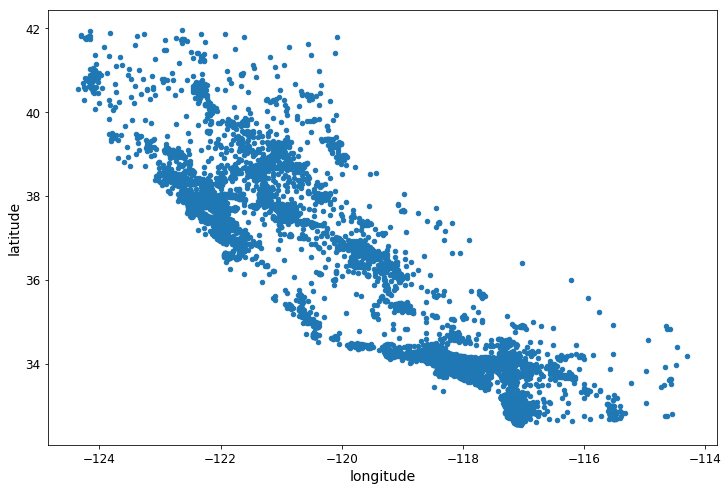

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8));

Let's see high-density areas:

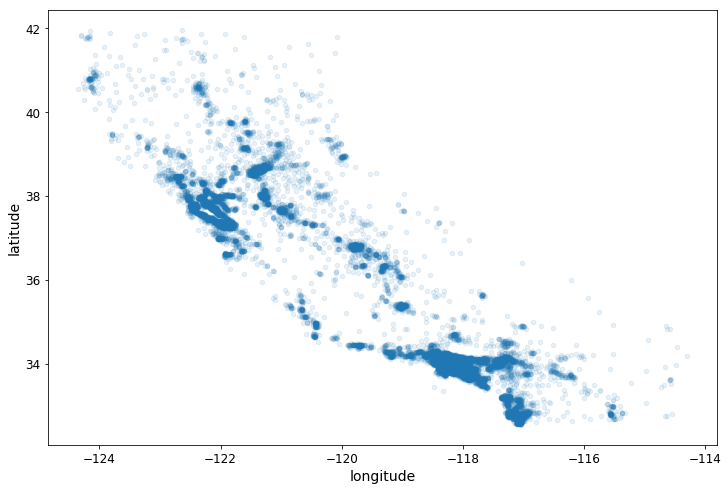

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8), alpha=0.1);

Now, let's look at the housing prices. The radius of each circle represents the district's population (option `s`), and the color represents the price (option `c`). 

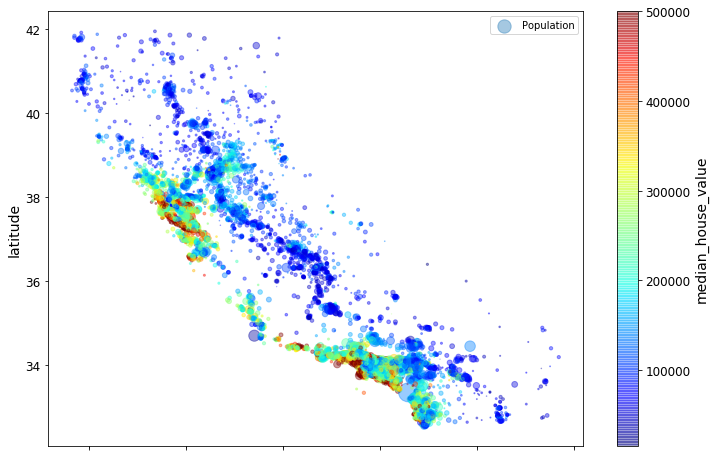

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8), alpha=0.4, c="median_house_value", cmap=plt.get_cmap("jet"), 
             s=housing["population"]/100, label="Population", colorbar=True);

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already.

**Looking for correlations**

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson's r):

In [12]:
corr_matrix = housing.corr()

In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a storng positive correlation; for example, the **median house value** tends to go up when the **median income** goes up. When the coefficient is close to -1, it means that there is a strong negative correlation; you can see a small negative correlation between the **latitude** and the **median house value** (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

**From these values, the median income is the most promising attribute to predict the median house value (see page 58)**.

Another way to check for correlations between attributes is to use `scatter_matrix`:

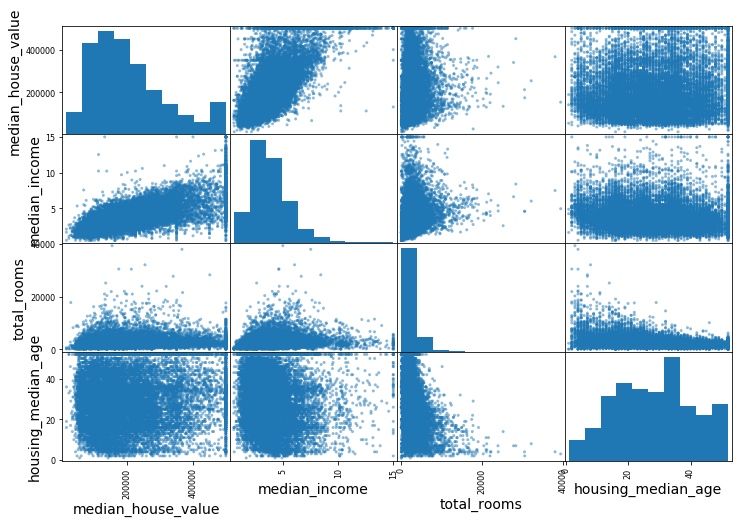

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

The main diagonal (top left to bottom) would be full of straight lines. Instead, Pandas displays a histogram of each attribute, like below:

In [18]:
housing["median_house_value"].plot(kind="hist");  # or housing["median_house_value"].hist()

The most promising attribute to predict the median house value is the median income, so let's zoom in on their correlation scatterplot:

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(12, 8), alpha=0.1);

This plot reveals a few things:

- The correlation is indeed very strong; you can clearlt see the upward trend and the points are not too dispersed.
- The price cap that we noticed earlier (see our previous histograms) is clearly visible as a horizontal  line at 500,000.
- This plot reveals other less obvious straight lines around 450,000, 350,000, 280,000, and a few more below that value. **You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks**.

**Experimenting with attribute combinations**

At this point:

- You know a few ways to explore the data and gain insights.
- You identified a few data quirks that you may want to clean up before feeding the data to a machine learning algorithm
- You found interesting correlations between attributes, namely `median_house_value` (target) and `median_income`.
- You noticed that some attributes have a tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm t

One last thing you may want to do before actually preparing the data for machine learning algorithms is to try out various attribute combinations. For example:

- The total number of rooms in a district (`rooms_per_household`) is not very useful if you don't know how many households there are. What you really want is the number of rooms per household.
- The toral number if bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.
- The population per household also seems like an interesting attribute combination to look at.

Let's create these new attributes:


In [12]:
# add new variables
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

**Note: Handling NANs** Remember that `"total_bedrooms"` has NaN values: 

In [16]:
housing.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

There are 158 NaN values in `housing` (actually, there are 207 in the whole dataset; remember, `housing` is the training dataset).


I think we can use the next code for reading the NaN values in `"total_bedrooms"`, but I need to verify it:

```python
to_keep = housing["total_bedrooms"].isna()
housing["total_bedrooms"].loc[to_keep]       # returns all NaN values
```

It must be done for each column, meaning that the next code does not work:

```python
to_keep_df = housing.isna()
housing.loc[to_keep_df]
ValueError: Cannot index with multidimensional key
```

**Update** You must use `df[df_indices]` to index a dataframe using another (boolean) dataframe:

```python
to_keep_df = housing.isna()
housing[to_keep_df]
```

Check p. 61 for more details.

You can use this to get the number of NaN values in a given column:

```python
# they are the same, see
# https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas
print(housing["total_bedrooms"].isnull().sum())    
print(housing["total_bedrooms"].isna().sum())
```

In [22]:
to_keep_df = housing.isna()
housing[to_keep_df].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606        NaN       NaN                 NaN          NaN             NaN   
18632        NaN       NaN                 NaN          NaN             NaN   
14650        NaN       NaN                 NaN          NaN             NaN   
3230         NaN       NaN                 NaN          NaN             NaN   
3555         NaN       NaN                 NaN          NaN             NaN   

       population  households  median_income  median_house_value  \
17606         NaN         NaN            NaN                 NaN   
18632         NaN         NaN            NaN                 NaN   
14650         NaN         NaN            NaN                 NaN   
3230          NaN         NaN            NaN                 NaN   
3555          NaN         NaN            NaN                 NaN   

      ocean_proximity  
17606             NaN  
18632             NaN  
14650             NaN  
3230              NaN  
3555              NaN

In [ ]:
# OJO: creo que el indexado anterior esta mal, ya que las siguientes dos celdas devuelven cosas distintas

In [98]:
# correcto: porque el shape del dataframe corresponde con el numero de NaN values en `total_bedrooms`, 158
sample_incomplete_rows = housing[housing.isna().any(axis=1)]#.head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0             NaN   
6068     -117.86     34.01                16.0       4632.0             NaN   
17923    -121.97     37.35                30.0       1955.0             NaN   
13656    -117.30     34.05                 6.0       2155.0             NaN   
19252    -122.79     38.48                 7.0       6837.0             NaN   
20267    -119.19     34.20                18.0       3620.0             NaN   
1606     -122.08     37.88                26.0       2947.0             NaN   
4496     -118.22     34.05                34.0       1113.0             NaN   
16879    -122.39     37.60                34.0        707.0             NaN   
2412     -119.45     36.61                24.0       1302.0             NaN   
9622     -120.32     37.29                38.0        576.0             NaN   
6590     -118.18     34.19                48.0       1371.0             NaN   
15890    -122.38     37.73                40.0        543.0             NaN   
14641    -117.20     32.79                29.0       1213.0             NaN   
7168     -118.17     34.06                43.0        464.0             NaN   
9571     -120.61     37.36                16.0        638.0             NaN   
4279     -118.31     34.09                37.0        773.0             NaN   
5751     -118.27     34.17                52.0       2010.0             NaN   
19485    -120.98     37.66                10.0        934.0             NaN   
19060    -122.41     38.16                37.0       1549.0             NaN   
4591     -118.28     34.06                42.0       2472.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
5654     -118.30     33.73                42.0       1731.0             NaN   
15397    -117.20     33.24                12.0       4992.0             NaN   
9620     -120.40     37.30                28.0       1401.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
2420     -119.44     36.58                37.0       1054.0             NaN   
9970     -122.48     38.50                37.0       3049.0             NaN   
17639    -121.90     37.28                26.0       3756.0             NaN   
...          ...       ...                 ...          ...             ...   
16757    -122.48     37.70                33.0       4492.0             NaN   
19932    -119.33     36.30                11.0       3045.0             NaN   
4743     -118.36     34.05                42.0       1372.0             NaN   
18177    -122.00     37.36                17.0       2070.0             NaN   
6835     -118.12     34.08                35.0       2248.0             NaN   
5236     -118.23     33.94                36.0       1110.0             NaN   
6962     -118.05     33.99                38.0       1619.0             NaN   
12570    -121.44     38.54                39.0       2855.0             NaN   
15607    -116.66     32.79                13.0        843.0             NaN   
19559    -120.98     37.60                36.0       1437.0             NaN   
7113     -118.02     33.89                36.0       1375.0             NaN   
14173    -117.05     32.75                36.0       2024.0             NaN   
11741    -121.13     38.87                48.0       1127.0             NaN   
13933    -117.31     34.25                29.0       4610.0             NaN   
15137    -116.91     32.83                16.0       5203.0             NaN   
15118    -116.95     32.84                31.0       1307.0             NaN   
16025    -122.44     37.73                39.0       1912.0             NaN   
17928    -121.97     37.34                33.0       3162.0             NaN   
5678     -118.30     33.72                35.0       2790

In [100]:
# incorrecto: porque el tamano de sample_incomplete es el mismo que el dataset original
sample_incomplete_rows = housing[housing.isna()]#.head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606        NaN       NaN                 NaN          NaN             NaN   
18632        NaN       NaN                 NaN          NaN             NaN   
14650        NaN       NaN                 NaN          NaN             NaN   
3230         NaN       NaN                 NaN          NaN             NaN   
3555         NaN       NaN                 NaN          NaN             NaN   
19480        NaN       NaN                 NaN          NaN             NaN   
8879         NaN       NaN                 NaN          NaN             NaN   
13685        NaN       NaN                 NaN          NaN             NaN   
4937         NaN       NaN                 NaN          NaN             NaN   
4861         NaN       NaN                 NaN          NaN             NaN   
16365        NaN       NaN                 NaN          NaN             NaN   
19684        NaN       NaN                 NaN          NaN             NaN   
19234        NaN       NaN                 NaN          NaN             NaN   
13956        NaN       NaN                 NaN          NaN             NaN   
2390         NaN       NaN                 NaN          NaN             NaN   
11176        NaN       NaN                 NaN          NaN             NaN   
15614        NaN       NaN                 NaN          NaN             NaN   
2953         NaN       NaN                 NaN          NaN             NaN   
13209        NaN       NaN                 NaN          NaN             NaN   
6569         NaN       NaN                 NaN          NaN             NaN   
5825         NaN       NaN                 NaN          NaN             NaN   
18086        NaN       NaN                 NaN          NaN             NaN   
16718        NaN       NaN                 NaN          NaN             NaN   
13600        NaN       NaN                 NaN          NaN             NaN   
13989        NaN       NaN                 NaN          NaN             NaN   
15168        NaN       NaN                 NaN          NaN             NaN   
6747         NaN       NaN                 NaN          NaN             NaN   
7398         NaN       NaN                 NaN          NaN             NaN   
5562         NaN       NaN                 NaN          NaN             NaN   
16121        NaN       NaN                 NaN          NaN             NaN   
...          ...       ...                 ...          ...             ...   
12380        NaN       NaN                 NaN          NaN             NaN   
5618         NaN       NaN                 NaN          NaN             NaN   
10060        NaN       NaN                 NaN          NaN             NaN   
18067        NaN       NaN                 NaN          NaN             NaN   
4471         NaN       NaN                 NaN          NaN             NaN   
19786        NaN       NaN                 NaN          NaN             NaN   
9969         NaN       NaN                 NaN          NaN             NaN   
14621        NaN       NaN                 NaN          NaN             NaN   
579          NaN       NaN                 NaN          NaN             NaN   
11682        NaN       NaN                 NaN          NaN             NaN   
245          NaN       NaN                 NaN          NaN             NaN   
12130        NaN       NaN                 NaN          NaN             NaN   
16441        NaN       NaN                 NaN          NaN             NaN   
11016        NaN       NaN                 NaN          NaN             NaN   
19934        NaN       NaN                 NaN          NaN             NaN   
1364         NaN       NaN                 NaN          NaN             NaN   
1236         NaN       NaN                 NaN          NaN             NaN   
5364         NaN       NaN                 NaN          NaN             NaN   
11703        NaN       NaN                 NaN          N

In [101]:
housing.shape

(16512, 10)

In [53]:
to_keep = housing["total_bedrooms"].isna()
housing["total_bedrooms"].loc[to_keep]

4629    NaN
6068    NaN
17923   NaN
13656   NaN
19252   NaN
20267   NaN
1606    NaN
4496    NaN
16879   NaN
2412    NaN
9622    NaN
6590    NaN
15890   NaN
14641   NaN
7168    NaN
9571    NaN
4279    NaN
5751    NaN
19485   NaN
19060   NaN
4591    NaN
538     NaN
5654    NaN
15397   NaN
9620    NaN
20484   NaN
19150   NaN
2420    NaN
9970    NaN
17639   NaN
         ..
16757   NaN
19932   NaN
4743    NaN
18177   NaN
6835    NaN
5236    NaN
6962    NaN
12570   NaN
15607   NaN
19559   NaN
7113    NaN
14173   NaN
11741   NaN
13933   NaN
15137   NaN
15118   NaN
16025   NaN
17928   NaN
5678    NaN
19638   NaN
10385   NaN
2647    NaN
14152   NaN
19766   NaN
1097    NaN
3376    NaN
4691    NaN
6052    NaN
17198   NaN
4738    NaN
Name: total_bedrooms, Length: 158, dtype: float64

From [this post](https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe), we can use these commands to check NaN values in dataframes:

In [56]:
# Show which columns has NaN values
housing.isnull().any()

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
median_house_value          False
ocean_proximity             False
income_cat                  False
rooms_per_household         False
bedrooms_per_room            True
population_per_household    False
dtype: bool

In [58]:
# Show only the columns with NaN values
housing.loc[:, housing.isnull().any()].columns

Index(['total_bedrooms', 'bedrooms_per_room'], dtype='object')

In [60]:
# Show the count of NaN values for each column
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [66]:
# Show the percentage of NaN values for each column
housing.isnull().sum() / len(housing) * 100

longitude                   0.00000
latitude                    0.00000
housing_median_age          0.00000
total_rooms                 0.00000
total_bedrooms              0.95688
population                  0.00000
households                  0.00000
median_income               0.00000
median_house_value          0.00000
ocean_proximity             0.00000
income_cat                  0.00000
rooms_per_household         0.00000
bedrooms_per_room           0.95688
population_per_household    0.00000
dtype: float64

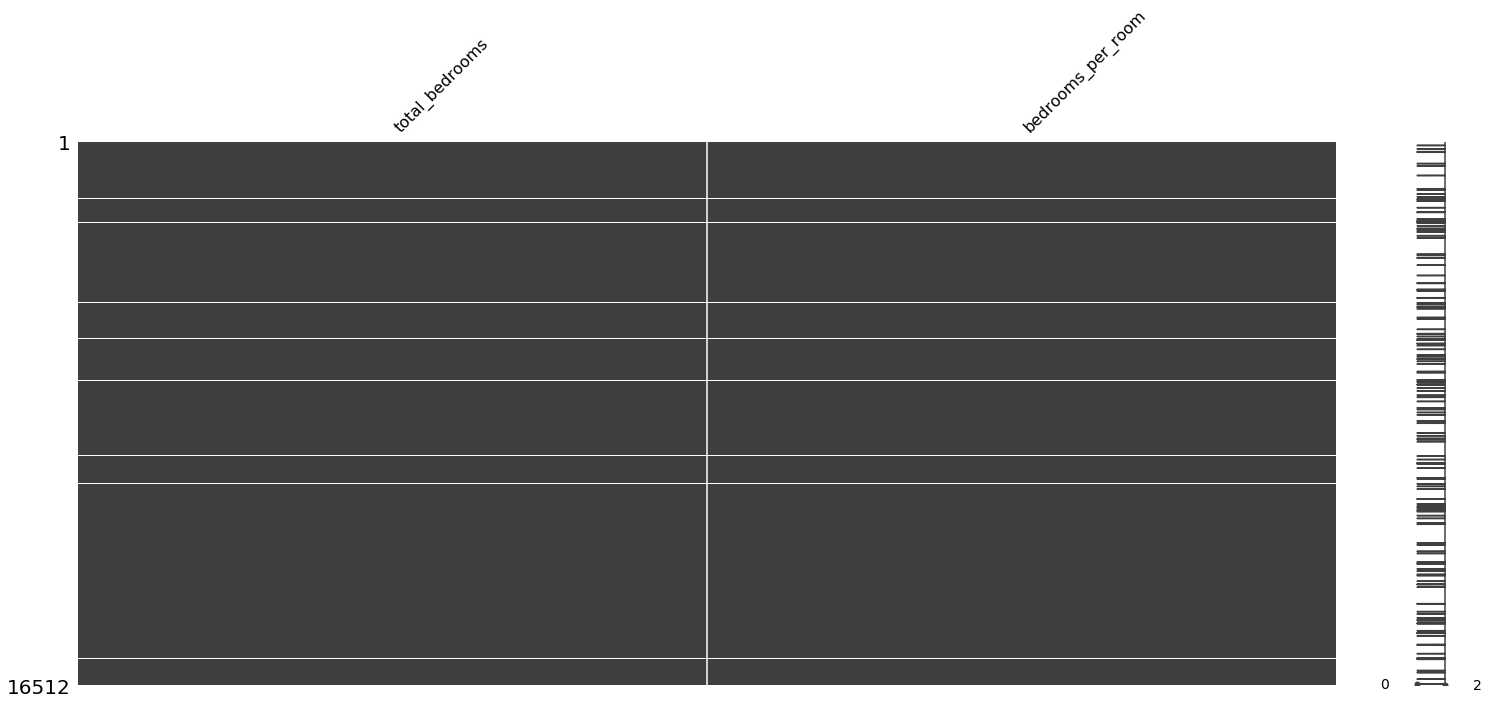

In [20]:
import missingno as msno
cols = housing.columns[housing.isnull().any()].tolist()  # ['total_bedrooms', 'bedrooms_per_room']
msno.matrix(housing[cols]);

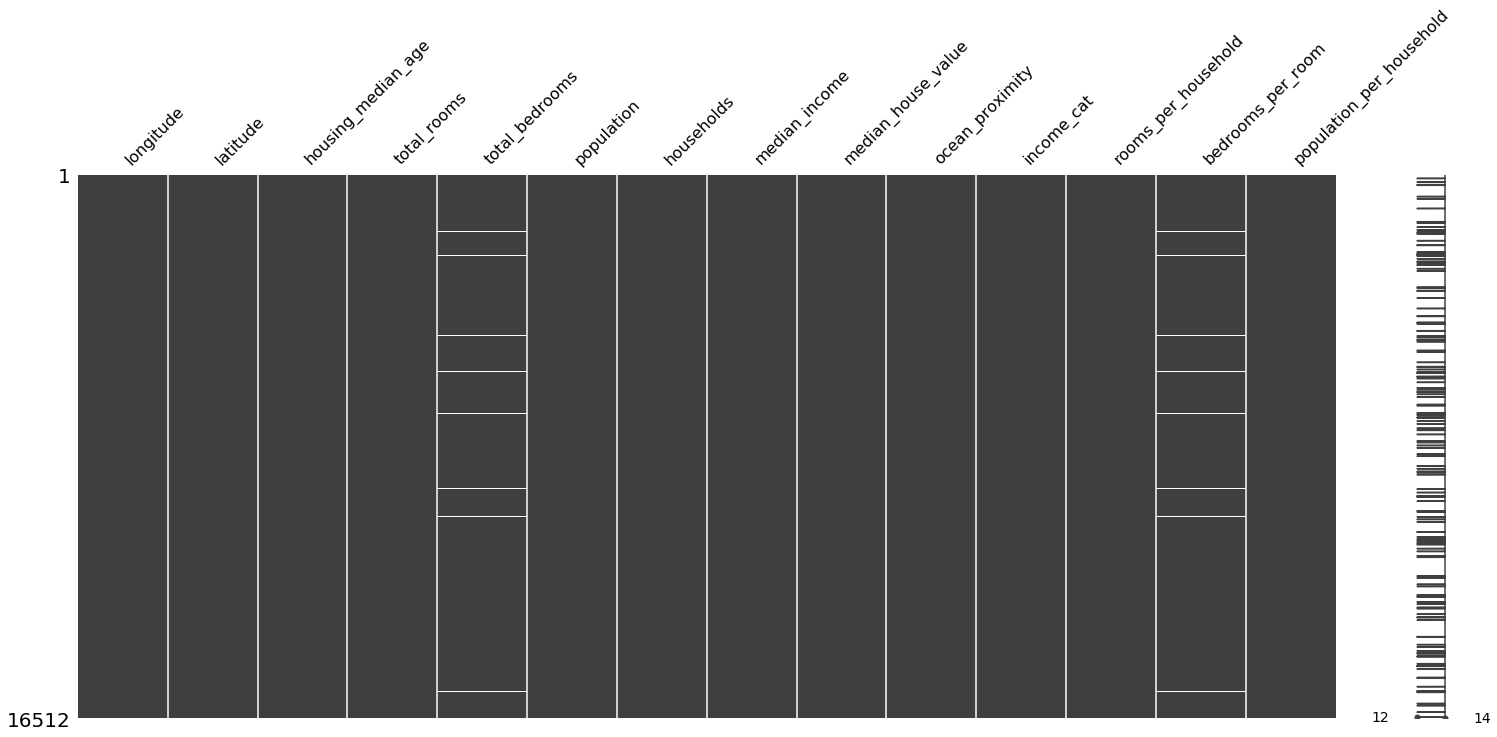

In [18]:
# alternatively, you can plot all attributes
import missingno as msno
msno.matrix(housing);

**Back to book** After creating new variables, let's look at the correlation again:

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` (`-0.259984`) attribute is much more correlated with `median_house_value` (target) than `total_rooms` (`0.135097`) or `total_bedrooms` (`0.047689`). Apparently houses with a lower bedroom/room ratio tend to be more expensive (i.e., it seems that *the lower the value of `bedrooms_per_room`, the higher the value of the target `median_house_value`*).

The number of rooms per household (`rooms_per_household`) is also more informative than the total number of rooms (`total_rooms`) in a district; obviously, the larger the houses, the more expensive they are.

The population per household does not provide meaninful information.

### Prepare the Data for Machine Learning Algorithms 

Let's separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target values (note that `drop()` creates a copy of the data and does not affect `strat_train_set`):


In [23]:
# separate predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Note about `drop`**

In [38]:
df = pd.DataFrame({"a": [1,2,3,4,5], "b": [10,20,30,40,50]})
df.drop(2)                     # drop row
df.drop("a", axis=1)           # drop column, axis is needed
df.drop("a", axis=1).drop(2)   # drop both

### Data cleaning
The `total_bedrooms` attribute has some missing values. We have three options to fix them:

- Get rid of the corresponding districts (i.e., remove rows with NaN values)
- Get rid of the whole attribute (i.e., remove column)
- Set the NaN values to some value (like zero, the  mean, the median, etc)

To illustrate each option, let's take a sample of the data with NaN values:

In [19]:
# get a sample of incomplete data
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0             NaN   
6068     -117.86     34.01                16.0       4632.0             NaN   
17923    -121.97     37.35                30.0       1955.0             NaN   
13656    -117.30     34.05                 6.0       2155.0             NaN   
19252    -122.79     38.48                 7.0       6837.0             NaN   

       population  households  median_income ocean_proximity  
4629       3296.0      1462.0         2.2708       <1H OCEAN  
6068       3038.0       727.0         5.1762       <1H OCEAN  
17923       999.0       386.0         4.6328       <1H OCEAN  
13656      1039.0       391.0         1.6675          INLAND  
19252      3468.0      1405.0         3.1662       <1H OCEAN

In [20]:
# option 1, drop rows with NaN values
# returns a new dataframe, the original dataframe is unchanged

# from documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# subset: array-like
#    labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # muesra un dataframe vacio porque borro todos los rows con NaNs

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [14]:
# option 2, drop a whole column
# returns a new dataframe, the original dataframe is unchanged

# from documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# labels: single label or list-like
#    index or column labels to drop
# axis: {0, or 'index', 1 or 'columns'}, default 0
#    whether to drop labels from the index (0 or 'index') or columns (1 or 'columns')
sample_incomplete_rows.drop(labels="total_bedrooms", axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
4629     -118.30     34.07                18.0       3759.0      3296.0   
6068     -117.86     34.01                16.0       4632.0      3038.0   
17923    -121.97     37.35                30.0       1955.0       999.0   
13656    -117.30     34.05                 6.0       2155.0      1039.0   
19252    -122.79     38.48                 7.0       6837.0      3468.0   

       households  median_income ocean_proximity  
4629       1462.0         2.2708       <1H OCEAN  
6068        727.0         5.1762       <1H OCEAN  
17923       386.0         4.6328       <1H OCEAN  
13656       391.0         1.6675          INLAND  
19252      1405.0         3.1662       <1H OCEAN

In [15]:
# option 3, replace NaN values with another value (e.g., median)
# if inplace is True, the input dataframe is modified in-place
# otherwise, it returns a new dataframe, and the input dataframe is unchanged

# from documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# value: scalar, dict, Series, or DataFrame
#    value to use to fill holes
# inplace: bool
#    if true, fill in-place
median = housing["total_bedrooms"].median()   
print("median", median)

sample_incomplete_rows.fillna(value=median, inplace=False)

median 433.0


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0           433.0   
6068     -117.86     34.01                16.0       4632.0           433.0   
17923    -121.97     37.35                30.0       1955.0           433.0   
13656    -117.30     34.05                 6.0       2155.0           433.0   
19252    -122.79     38.48                 7.0       6837.0           433.0   

       population  households  median_income ocean_proximity  
4629       3296.0      1462.0         2.2708       <1H OCEAN  
6068       3038.0       727.0         5.1762       <1H OCEAN  
17923       999.0       386.0         4.6328       <1H OCEAN  
13656      1039.0       391.0         1.6675          INLAND  
19252      3468.0      1405.0         3.1662       <1H OCEAN

Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`

In [24]:
# separate numerical data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# since the median can only be computed on numerical attributes, need to create a copy of the data without `ocean_proximity`
housing_num = housing.drop("ocean_proximity", axis=1)

# now we can fit the imputer instance to the training set
imputer.fit(housing_num)

# the median of each attribute in statistics_
print(imputer.statistics_)

# now compare the results with the median of each column in the training set
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


Now, we can use this *trained* `imputer` to transform the training set by replacing missing values by the learned medians:

In [25]:
## X: Numpy array
# housing_num: Pandas DataFrame
X = imputer.fit_transform(housing_num)

# create a new dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621  
3      1460.0       353.0         1.8839  
4      4459.0      1463.0         3.0347

You may want to check the rows with NaN value after using the imputer, let's check it out:

In [30]:
# get the indices of the rows with nan values in the training set
to_keep = housing.isna().any(axis=1)

# cast it as a numpy array
indices = to_keep.to_numpy()

# original data
housing[indices].tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3376     -118.28     34.25                29.0       2559.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
6052     -117.76     34.04                34.0       1914.0             NaN   
17198    -119.75     34.45                 6.0       2864.0             NaN   
4738     -118.38     34.05                49.0        702.0             NaN   

       population  households  median_income ocean_proximity  
3376       1886.0       769.0         2.6036       <1H OCEAN  
4691       1117.0       516.0         4.3667       <1H OCEAN  
6052       1564.0       328.0         2.8347          INLAND  
17198      1404.0       603.0         5.5073      NEAR OCEAN  
4738        458.0       187.0         4.8958       <1H OCEAN

In [18]:
# transformed data
housing_tr[indices].tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15722    -118.28     34.25                29.0       2559.0           433.0   
16063    -118.37     34.07                50.0       2519.0           433.0   
16124    -117.76     34.04                34.0       1914.0           433.0   
16326    -119.75     34.45                 6.0       2864.0           433.0   
16474    -118.38     34.05                49.0        702.0           433.0   

       population  households  median_income  
15722      1886.0       769.0         2.6036  
16063      1117.0       516.0         4.3667  
16124      1564.0       328.0         2.8347  
16326      1404.0       603.0         5.5073  
16474       458.0       187.0         4.8958

In [19]:
# Geron uses this approach

# create a new dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing.index)               # Geron added this line

housing_tr.loc[sample_incomplete_rows.index.values]         # Devuelve resultados en un orden distinto (no me agrada ese indexado)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0           433.0   
6068     -117.86     34.01                16.0       4632.0           433.0   
17923    -121.97     37.35                30.0       1955.0           433.0   
13656    -117.30     34.05                 6.0       2155.0           433.0   
19252    -122.79     38.48                 7.0       6837.0           433.0   

       population  households  median_income  
4629       3296.0      1462.0         2.2708  
6068       3038.0       727.0         5.1762  
17923       999.0       386.0         4.6328  
13656      1039.0       391.0         1.6675  
19252      3468.0      1405.0         3.1662

### Handling Text and Categorial Attributes

Let's convert these categories from text to numbers. For this, we can use Scikit-Learn's `OrdinalEncoder` class:

In [26]:
# separate catergorical data
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

**Possible improvement** Merge `ISLAND` with another category since there are only two records with that value.

In [21]:
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [27]:
# from documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# Encode categorical features as an integer array
# The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorial (discrete) features. The features
# are converted to ordinal integers.

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [33]:
# Youo can get the list of categories using the `categories_` instance variable
# It is a list containing a 1D array of categories for each categorical attribute
# In this case, a list containing a single array since there is just one categorical attribute
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for **ordered categories**)


**Check Deep Learning with PyTorch p 43** for a discussion on interval, ordinal, and categorial values:

- Interval values are **continuous**. They are strictly ordered and a difference between various values has a strict meaning. If you are counting or measuring something with units, the value probably is a continuous value.

- Ordinal values. The strict ordering of continuous values remains, but the fixed relationship between values no longer applies. Example: ordering a small, medium, or large drink, with small mapped to the value 1, medium to 2, and large to 3. We can tell that the large drink is bigger than the medium, in the same way that 3 is bigger than 2, but it does not tell anything about *how much* bigger.

- Categorial values have neither ordering nor numerical meaning. These values are often enumerations of possibilities, assigned arbitraty numbers. Example, assinging water to 1, coffe to 2, soda to 3, and milk to 4. Placing water first and milk last has no real logic, you simply need distinct values to differenciate them.

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output if a SciPy **sparse matrix**, instead of a NumPy array. This means that we cannot access to values via indexing:

In [29]:
housing_cat_1hot[:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [30]:
housing_cat_1hot[:5, 0]

<5x1 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

We can change that by either using `sparse=False` when creating an instance of `OneHotEncoder` or by calling `housing_cat_1hot.toarray()`:

In [31]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)                   # use hyperparameter sparse=False
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)    
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [33]:
# Finally, we can thet the list of categories as follows:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Note** If a categorial attribute has a large number of categories (like a postal code), use embeddings.

### Custom Transformers

You may need to write your own custom transformer for tasks like cleanup operations of combining specific attributes. To do so, all you need is to create a class and implement three methods:

- `fit()` returning `self`.
- `transform()`
- `fit_transform()` use `TransformerMixing` to get this method.

Here is a small transformer class that adds the combined attributes we discussed earlier:

In [29]:
# previous code
# add new variables
# housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
# housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
# housing["population_per_household"] = housing["population"] / housing["households"]

from sklearn.base import BaseEstimator, TransformerMixin

# get column indices (3, 4, 5, 6)
total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = [
        list(housing.columns).index(col) for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    
    # alejandra aguayo
    # no *args, no **kwargs
    # add_bedrooms_per_room is a hyperparameter
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    # just return self
    def fit(self, X, y=None):
        return self
    
    # note, X is a Numpy array, not a dataframe
    def transform(self, X, y=None):
        rooms_per_household      = X[:, total_rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_ix] / X[:, total_rooms_ix]
            return np.c_[X, 
                         rooms_per_household, 
                         population_per_household, 
                         bedrooms_per_room]
        
        return np.c_[X, 
                     rooms_per_household, 
                     population_per_household]

attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

# print shape
print("shape", housing_extra_attribs.shape)

housing_extra_attribs[:2, :]

shape (16512, 12)


array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117,
        0.15905743740795286]], dtype=object)

In [15]:
# nota que housing no fue alterado, ya que no cuenta con las tres columnas despues de '<1 OCEAN'
housing.values[:2, :]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN'],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN']], dtype=object)

In [35]:
# podemos invocar a fit() o fit_transform()
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs[:2, :]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117,
        0.15905743740795286]], dtype=object)

In [38]:
# We can convert the numpy array housing_extra_attribs to a dataframe as follows
housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs,
                                        columns=list(housing.columns)+["rooms_per_household", "population_per_household", "bedrooms_per_room"],
                                        index=housing.index)

In [39]:
# Now, this dataframe has three new columns
housing_extra_attribs_df.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
17606   -121.89    37.29                 38        1568            351   
18632   -121.93    37.05                 14         679            108   
14650    -117.2    32.77                 31        1952            471   
3230    -119.61    36.31                 25        1847            371   
3555    -118.59    34.23                 17        6592           1525   

      population households median_income ocean_proximity rooms_per_household  \
17606        710        339        2.7042       <1H OCEAN             4.62537   
18632        306        113        6.4214       <1H OCEAN             6.00885   
14650        936        462        2.8621      NEAR OCEAN             4.22511   
3230        1460        353        1.8839          INLAND             5.23229   
3555        4459       1463        3.0347       <1H OCEAN             4.50581   

      population_per_household bedrooms_per_room  
17606                   2.0944          0.223852  
18632                  2.70796          0.159057  
14650                  2.02597          0.241291  
3230                   4.13598          0.200866  
3555                   3.04785          0.231341

### Feature scaling (standarization)

In [30]:
# from documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance:
# z = (x - u) / s
# u: mean of x
# s: standard deviation of x

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing_num)

# debug info after fitting
cols = list(housing_num.columns)
print("means", ["%s: %.2f" % (cols[ix], v) for ix, v in enumerate(scaler.mean_)])
print("standard deviations", ["%s: %.2f" % (cols[ix], v) for ix, v in enumerate(scaler.scale_)])

# just to verify debug info
housing_num.describe()

means ['longitude: -119.58', 'latitude: 35.64', 'housing_median_age: 28.65', 'total_rooms: 2622.73', 'total_bedrooms: 534.97', 'population: 1419.79', 'households: 497.06', 'median_income: 3.88']
standard deviations ['longitude: 2.00', 'latitude: 2.14', 'housing_median_age: 12.57', 'total_rooms: 2138.39', 'total_bedrooms: 412.69', 'population: 1115.65', 'households: 375.71', 'median_income: 1.90']


longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575834     35.639577           28.653101   2622.728319   
std        2.001860      2.138058           12.574726   2138.458419   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.500000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    16354.000000  16512.000000  16512.000000   16512.000000  
mean       534.973890   1419.790819    497.060380       3.875589  
std        412.699041   1115.686241    375.720845       1.904950  
min          2.000000      3.000000      2.000000       0.499900  
25%        295.000000    784.000000    279.000000       2.566775  
50%        433.000000   1164.000000    408.000000       3.540900  
75%        644.000000   1719.250000    602.000000       4.744475  
max       6210.000000  35682.000000   5358.000000      15.000100

In [31]:
# remember, X is a numpy array
X = scaler.fit_transform(housing_num)

# convert X to dataframe
scaled_housing_num = pd.DataFrame(X, 
                                  columns=housing_num.columns)

# debug info after fit_transform()
cols = list(scaled_housing_num.columns)
print("means", ["%s: %.2f" % (col, scaled_housing_num[col].mean()) for col in cols])
print("std  ", ["%s: %.2f" % (col, scaled_housing_num[col].std()) for col in cols])

# check data
scaled_housing_num.describe().style.format("{:.2%}")

means ['longitude: -0.00', 'latitude: 0.00', 'housing_median_age: -0.00', 'total_rooms: 0.00', 'total_bedrooms: 0.00', 'population: -0.00', 'households: 0.00', 'median_income: -0.00']
std   ['longitude: 1.00', 'latitude: 1.00', 'housing_median_age: 1.00', 'total_rooms: 1.00', 'total_bedrooms: 1.00', 'population: 1.00', 'households: 1.00', 'median_income: 1.00']


As it can be seen, the mean and std of each attribute is 0 and 1 after standarization.

### Transformation pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    # (str_label, transformer)
    ('imputer', SimpleImputer(strategy="median")),
    ('attrib_adder', CombinedAttributeAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler())
])

# remember, the output of the pipeline is a numpy array,
# so we cannot call .describe()
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Scikit-Learn introduced the `ColumnTransformer` class for this purpose. Let's use it to apply all the transformations to the housing data:

In [33]:
# full pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# remember, housing_prepared is a numpy array not a dataframe
housing_prepared = full_pipeline.fit_transform(housing)

In [47]:
housing_prepared.shape

(16512, 16)

## Select and Train a Model

Let's first train a linear regression model:

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! You now have a working linear regression model. Let's try it out on a few instances form the training set:

In [35]:
# Let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)  # por que esta linea no modifico los datos? porque uso housing.iloc[:5] como input, no housing_prepared.iloc[:5]

print("Predictions", lin_reg.predict(some_data_prepared))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [36]:
# acamacho: the same as above
print("Predictions", lin_reg.predict(housing_prepared[:5]))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [37]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [38]:
# Creo que el autor uso esta formula cuando dice "the first prediction is off by close 40%", aunque si fuera asi
# deberia ser casi 50% ~ 26.5*2
pred = lin_reg.predict(some_data_prepared)
(pred-some_labels)/some_labels*100

17606   -26.502231
18632    -6.703228
14650     7.138869
3230     27.902784
3555    -25.443003
Name: median_house_value, dtype: float64

Let's measure this regression model's RMSE (root of mean squared error) and MAE (mean absolute error) on the whole training set:

In [39]:
# evaluate linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# make predictions on training data
housing_predictions = lin_reg.predict(housing_prepared)

# mean_squared_error(y_true, y_pred)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.4f" % lin_rmse)

# mean_absolute_error(y_true, y_pred)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print("MAE: %.4f" % lin_mae)

# r2_score(y_true, y_pred)
lin_r2 = r2_score(housing_labels, housing_predictions)
print("R2: %.4f" % lin_r2)

RMSE: 68628.1982
MAE: 49439.8960
R2: 0.6482


Okay, this is better than nothing, but clearly not a great score: most districts' `median_housing_values` range between 120,000 and 265,000 USD, so a typical prediction error of 68,628 USD is not very satisfying.


From [Building Machine Learning Systems with Python], page 160:

> One advantage of using RMSE is that we can quickly obtain a very rough estimate of the error by multiplying it by two. In our case, we can expect the estimated price to be different from the real price by, at most, 13 thousand dollars.

> **Root mean squared error and prediction**
> Root mean squared error corresponds approximately to an estimate of the standard deviation. Since most data is at most two standard deviations from the mean, we can double our RMSE to obtain a rough confident interval. This is only completely valid if the errors are normally distributed, but it is often roughly correct if they are not.

The same authors recommend to use the **coefficient of determination** or R2 score which can be obtained using `r2_score`. According to them, a RMSE value can be still hard to intuit. They introduce a baseline model: If we knew nothing of the input, the best we could do is predict that the output will always be the average value of `y` (i.e., the label). We can then compare the MSE (not RMSE) of this model with the MSE of the null model. This idea is formalized in the coefficient of determination:

$$
1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2}  \approx 1 - \frac{MSE}{Var(y)}
$$



In [40]:
# this is another way to compute the coefficient of determination when using linear regression
lin_reg.score(housing_prepared, housing_labels)

0.6481624842804428

Try another machine learning algorithm, this time, a `DecisionTreeRegressor`:

In [41]:
# evaluate decision tree
from sklearn.tree import DecisionTreeRegressor

# create and train model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
print(tree_reg)

# make predictions on training data
tree_predictions = tree_reg.predict(housing_prepared)

# mean_squared_error(y_true, y_pred)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE: %.4f" % tree_rmse)

# mean_absolute_error(y_true, y_pred)
tree_mae = mean_absolute_error(housing_labels, tree_predictions)
print("MAE: %.4f" % tree_mae)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
RMSE: 0.0000
MAE: 0.0000


No error at all? The model has badly overfit the data. Below, we use part of the training set for training, and part for model validation.

## Better evaluation using cross-validation

The following code performs K-fold cross validation: It randomly splits the training set into 10 distinct subsets called *folds*, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print("Scores:", " ".join(["%.4f\n" % s for s in scores]))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: 70194.3368
 66855.1636
 72432.5824
 70758.7390
 71115.8823
 75585.1417
 70262.8614
 70273.6325
 75366.8795
 71231.6573

Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


Now the Decision Tree does not look as good as it did before. In fact, it seems to perform worse than the Linear Regression model. Let's compute the same scores for the Linear Regression model just to be sure:

In [44]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: 66782.7384
 66960.1181
 70347.9524
 74739.5705
 68031.1339
 71193.8418
 64969.6306
 68281.6114
 71552.9157
 67665.1008

Mean: 69052.46136345083
Standard deviation: 2731.674001798348


That's right: The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

The following code also uses K-fold cross-validation for training and evaluating the Decision Tree model. However, we use the approach described in page 85. This way, the sampling is stratified. Here, we first create 10 categories from the labels:

```python
# create bins for stratified sampling
housing_labels_values = housing_labels.values
y_bins = pd.cut(housing_labels_values, bins=10, labels=[1,2,3,4,5,6,7,8,9,10])
```

We then use `y_bins` for the stratified K-fold cross-validation via `kf.split(X, y_bins)`:

```python
for k_fold, (train, test) in enumerate(kf.split(X, y_bins)):
    
    # training set
    X_train_fold = housing_prepared[train]
    y_train_fold = housing_labels_values[train]   # indexing a numpy array, not a series!
    
    # validation set
    X_val_fold = housing_prepared[test]
    y_val_fold = housing_labels_values[test]     # indexing a numpy array, not a series!
    
    ...
```

**Note about indexing** Notice that `housing_labels` is a pandas `Series` object whereas `housing_labels_values` is a numpy array. We use `house_labels_values` for creating the folds. I noticed that if we use `housing_labels` when creating the folds, this line will throw an error: `housing_labels_values[train]`:


```
FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
```

As far as I know, the cause of that error is a *bad* indexing. We can fix this issue by replacing:

```python
y_train_fold = housing_labels[train]
y_val_fold = housing_labels[test]
```

with:

```python
y_train_fold = housing_labels.iloc[train]
y_val_fold = housing_labels.iloc[test]
```

In [45]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.base import clone

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=42)
# kf = KFold(n_splits=n_splits, random_state=42)                      # if you use this line, you will get the same results as with cross_val_score
rmse_hist = np.ones((n_splits, ))
mae_hist = np.ones((n_splits, ))

# create dummy X
n_samples = len(housing_labels)
X = np.zeros((n_samples, ))

# create bins for stratified sampling
housing_labels_values = housing_labels.values
y_bins = pd.cut(housing_labels_values, bins=10, labels=[1,2,3,4,5,6,7,8,9,10])

for k_fold, (train, test) in enumerate(skf.split(X, y_bins)):        # use skf.split() for stratified sampling or kf.split()
    
    print("fold", k_fold)
    
    # create a new model from scratch, using the same hyperparameters
    # clone(estimator) does a deep copy of the `estimator` model without
    # actually copying attached data. It yields a new estimator with the same
    # parameters that has not been fit on any data
    clone_tree_reg = clone(tree_reg)
    
    # training set
    X_train_fold = housing_prepared[train]
    y_train_fold = housing_labels_values[train]   # indexing a numpy array, not a series!
    
    # validation set
    X_val_fold = housing_prepared[test]
    y_val_fold = housing_labels_values[test]     # indexing a numpy array, not a series!
    
    # training
    clone_tree_reg.fit(X_train_fold, y_train_fold)
    
    # prediction
    y_pred = clone_tree_reg.predict(X_val_fold)
    
    # mean_squared_error(y_true, y_pred)
    tree_mse = mean_squared_error(y_val_fold, y_pred)
    tree_rmse = np.sqrt(tree_mse)
    rmse_hist[k_fold] = tree_rmse
    print("\tRMSE %.4f" % tree_rmse)
    
    # mean_absolute_error(y_true, y_pred)
    tree_mae = mean_absolute_error(y_val_fold, y_pred)
    mae_hist[k_fold] = tree_mae
    print("\tMAE %.4f" % tree_mae)

fold 0
	RMSE 68969.7516
	MAE 43415.2498
fold 1
	RMSE 70099.7502
	MAE 45811.1595
fold 2
	RMSE 69916.0986
	MAE 44322.2964
fold 3
	RMSE 74981.8031
	MAE 47505.4235
fold 4
	RMSE 73804.1278
	MAE 46856.6398
fold 5
	RMSE 70023.8743
	MAE 44375.2503
fold 6
	RMSE 70815.3908
	MAE 45340.7549
fold 7
	RMSE 67918.2676
	MAE 43054.4041
fold 8
	RMSE 74635.5548
	MAE 47002.0437
fold 9
	RMSE 69609.9658
	MAE 44247.6129


In [46]:
def display_scores_cv(scores):
    for kf, score in enumerate(scores):
        print("Fold %d, score: %.4f" % (kf, score))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
print("RMSE")
display_scores_cv(rmse_hist)

RMSE
Fold 0, score: 68969.7516
Fold 1, score: 70099.7502
Fold 2, score: 69916.0986
Fold 3, score: 74981.8031
Fold 4, score: 73804.1278
Fold 5, score: 70023.8743
Fold 6, score: 70815.3908
Fold 7, score: 67918.2676
Fold 8, score: 74635.5548
Fold 9, score: 69609.9658
Mean: 71077.45844954666
Standard deviation: 2353.689044466099


Compare that values with our initial cross-validation without stratified sampling:
    
```
Scores: 70194.3368
 66855.1636
 72432.5824
 70758.7390
 71115.8823
 75585.1417
 70262.8614
 70273.6325
 75366.8795
 71231.6573

Mean: 71407.68766037929
Standard deviation: 2439.4345041191004
```

It seems that the mean RMSE (71077.458) is a little bit lower (i.e., better) when using stratified K-fold cross-validation.

In [55]:
print("MAE")
display_scores_cv(mae_hist)

MAE
Fold 0, score: 43415.2498
Fold 1, score: 45811.1595
Fold 2, score: 44322.2964
Fold 3, score: 47505.4235
Fold 4, score: 46856.6398
Fold 5, score: 44375.2503
Fold 6, score: 45340.7549
Fold 7, score: 43054.4041
Fold 8, score: 47002.0437
Fold 9, score: 44247.6129
Mean: 45193.083493646685
Standard deviation: 1478.0451788205028


Let's try another model now: the `RandomForestRegressor`. Random Forests work by training many Decision Trees on random subsets of features, then averaging out their predictions. Building a model on top of many other models is called *Ensemble Learning*, and it is often a great way to push Machine Learning algorithms even further.

In [47]:
# evaluate random forest
from sklearn.ensemble import RandomForestRegressor

# create and train model
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# make predictions
forest_predictions = forest_reg.predict(housing_prepared)

# mean_squared_error(y_true, y_pred)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE: %.4f" % forest_rmse)

# mean_absolute_error(y_true, y_pred)
forest_mae = mean_absolute_error(housing_labels, forest_predictions)
print("MAE: %.4f" % forest_mae)

# I dont remember why did I put this here
#lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
#                        scoring="neg_mean_squared_error", cv=10)
#
#lin_rmse_scores = np.sqrt(-lin_scores)
#display_scores(lin_rmse_scores)

RMSE: 21933.3141
MAE: 13520.6924


In [48]:
# this takes a few seconds
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: 51646.4455
 48940.6011
 53050.8632
 54408.9873
 50922.1487
 56482.5070
 51864.5203
 49760.8504
 55434.2163
 53326.1009

Mean: 52583.72407377466
Standard deviation: 2298.353351147122


This is much better: Random Forests look very promising. However, note that the score on the training set (`RMSE: 21933.3141`) is still much lower than on the validation sets (`Mean: 52583.72407377466`), meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

Before diving much deeper in Random Forests, we will try two more Machine Learning algorithms: a Support Vector Machine (SVM) and a Neural Network (with Keras). 

In [49]:
# evaluate SVM
from sklearn.svm import SVR

# create and train model
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
print(svm_reg)

# make predictions on training data
svm_predictions = svm_reg.predict(housing_prepared)

# mean_squared_error(y_true, y_pred)
svm_mse = mean_squared_error(housing_labels, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print("RMSE: %.4f" % svm_rmse)

# mean_absolute_error(y_true, y_pred)
svm_mae = mean_absolute_error(housing_labels, svm_predictions)
print("MAE: %.4f" % svm_mae)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
RMSE: 111094.6309
MAE: 81841.4700


In [50]:
# this takes a few minutes
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: 105342.0914
 112489.2462
 110092.3504
 113403.2289
 110638.9012
 115675.8320
 110703.5689
 114476.8901
 113756.1797
 111520.1121

Mean: 111809.84009600841
Standard deviation: 2762.393664321567


It seems that SVM does not perform well in this case (`Mean: 111809.84009600841`). Just for comparison:


```python
# linear regression after using cross_val_score
Mean: 69052.46136345083
Standard deviation: 2731.674001798348
```

## Bonus: Neural Network for regression

Here, we use the approach of Chollet described in p. 85

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


# Listing 3.26 Model definition
def build_model():
    n_attributes = 16
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(n_attributes, )))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    
    model.compile(optimizer="rmsprop",
                 loss="mse",
                 metrics=["mae"])
    return model


# Listing 3.28 Saving the validation logs at each fold

# alias
train_data = housing_prepared
train_targets = housing_labels.values

k = 4  # number of folds
num_val_samples = len(train_data) // k
num_epochs = 50
all_mae_histories = []

for i in range(k):
    
    # uncomment this line to proceed
    print("uncomment line to proceed")
    break
    
    print("processing fold #", i)
    
    
    val_data    = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    # create model
    model = build_model()
    
    # training
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    
    # log mae
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)
    
    # save model
    name = "model_fold_%d.h5" % i
    model.save(name)
    

processing fold # 0
Train on 12384 samples, validate on 4128 samples
Epoch 1/50
12384/12384 [==============================] - 12s 999us/step - loss: 22121327978.8947 - mean_absolute_error: 107829.5629 - val_loss: 5466537526.9844 - val_mean_absolute_error: 52407.9255
Epoch 2/50
12384/12384 [==============================] - 12s 970us/step - loss: 5055146703.7629 - mean_absolute_error: 50485.3855 - val_loss: 4563568507.6615 - val_mean_absolute_error: 47419.6814
Epoch 3/50
12384/12384 [==============================] - 12s 995us/step - loss: 4719212398.4977 - mean_absolute_error: 48380.7898 - val_loss: 4467607019.6009 - val_mean_absolute_error: 46603.3355
Epoch 4/50
12384/12384 [==============================] - 13s 1ms/step - loss: 4685915482.8351 - mean_absolute_error: 47913.7972 - val_loss: 4422077370.0988 - val_mean_absolute_error: 46057.2736
Epoch 5/50
12384/12384 [==============================] - 12s 973us/step - loss: 4670098700.6602 - mean_absolute_error: 47510.8056 - val_loss: 

12384/12384 [==============================] - 12s 944us/step - loss: 4368981296.3727 - mean_absolute_error: 44087.8865 - val_loss: 5141542944.6325 - val_mean_absolute_error: 45997.9731
Epoch 34/50
12384/12384 [==============================] - 12s 946us/step - loss: 4368926216.0989 - mean_absolute_error: 43946.9727 - val_loss: 5166530900.0697 - val_mean_absolute_error: 45918.5831
Epoch 35/50
12384/12384 [==============================] - 12s 946us/step - loss: 4397751229.1969 - mean_absolute_error: 44002.6529 - val_loss: 5163304221.0780 - val_mean_absolute_error: 45548.7621
Epoch 36/50
12384/12384 [==============================] - 12s 945us/step - loss: 4394812771.9070 - mean_absolute_error: 44067.1877 - val_loss: 5099969084.2793 - val_mean_absolute_error: 45582.6259
Epoch 37/50
12384/12384 [==============================] - 12s 947us/step - loss: 4381402882.5537 - mean_absolute_error: 43963.1132 - val_loss: 5190222789.2799 - val_mean_absolute_error: 45698.1135
Epoch 38/50
12384/1238

12384/12384 [==============================] - 12s 984us/step - loss: 4484158215.7747 - mean_absolute_error: 44758.9173 - val_loss: 4643557117.3731 - val_mean_absolute_error: 45569.2740
Epoch 16/50
12384/12384 [==============================] - 12s 974us/step - loss: 4515299194.5261 - mean_absolute_error: 44718.6586 - val_loss: 4638238088.8485 - val_mean_absolute_error: 45582.2434
Epoch 17/50
12384/12384 [==============================] - 12s 983us/step - loss: 4492130612.1940 - mean_absolute_error: 44686.6759 - val_loss: 4647341783.3789 - val_mean_absolute_error: 45378.6146
Epoch 18/50
12384/12384 [==============================] - 12s 982us/step - loss: 4547106413.1724 - mean_absolute_error: 44599.3430 - val_loss: 4577165888.0299 - val_mean_absolute_error: 45528.7478
Epoch 19/50
12384/12384 [==============================] - 12s 984us/step - loss: 4516770139.5181 - mean_absolute_error: 44599.8362 - val_loss: 4661137109.0817 - val_mean_absolute_error: 45397.5057
Epoch 20/50
12384/1238

In [25]:
# Listing 3.29 Building the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

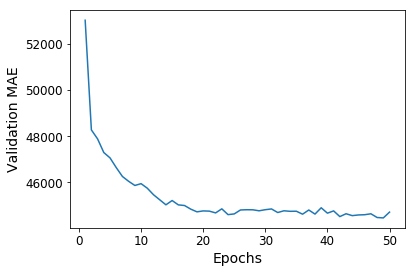

In [26]:
# Listing 3.30 Plotting validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

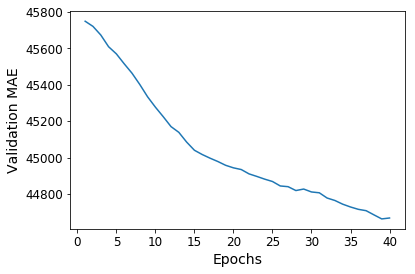

In [27]:
# Listing 3.31 Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

## Fine-tune your model

Let's assume that you have a shortlist of promising models. You now need to fine-tune them. Let's look at a few ways you can do that.

### Grid Search

We can use `GridSearchCV`. All we need to do is to tell it which hyperparameters you want it to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation.

The following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`:

**Question** What is the meaning of the lists in `param_grid`? Can we use more than two lists?

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x2) combinations of hyperparameters
    {"n_estimators": [3, 10, 30], "max_features": [2,4,6,8]},
    # then try 6 (2x3)
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2,3,4]},   
]

forest_reg = RandomForestRegressor(random_state=42)

# train accross 5 folds, that is a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

The best hyperparameter combination found: 

In [53]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'max_features': 2, 'n_estimators': 3, 'bootstrap': False}
54658.14484390074 {'max_features': 2, 'n_estimators': 10, 'bootstrap': False}
59470.399594730654 {'max_features': 3, 'n_estimators': 3, 'bootstrap': False}
52725.01091081235 {'max_features': 3, 'n_estimators': 10, 'bootstrap': F

In [56]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.064874         0.003340    -4.053749e+09     -1.105559e+09   
1        0.203740         0.008635    -3.094381e+09     -5.818785e+08   
2        0.611608         0.024036    -2.849913e+09     -4.394734e+08   
3        0.113665         0.003640    -3.716852e+09     -9.848396e+08   
4        0.337267         0.008564    -2.781611e+09     -5.163863e+08   
5        1.080449         0.026103    -2.537877e+09     -3.879289e+08   
6        0.159564         0.004031    -3.441447e+09     -9.023976e+08   
7        0.492945         0.009040    -2.704640e+09     -5.013349e+08   
8        1.474826         0.025532    -2.514668e+09     -3.841296e+08   
9        0.178882         0.003213    -3.348851e+09     -8.883545e+08   
10       0.601068         0.008740    -2.674037e+09     -4.923911e+08   
11       1.856115         0.024564    -2.468326e+09     -3.810330e+08   
12       0.100497         0.003870    -3.955792e+09      0.000000e+00   
13       0.334551         0.011066    -2.987513e+09     -6.056027e-01   
14       0.136024         0.003711    -3.536728e+09     -1.214568e+01   
15       0.439777         0.010640    -2.779927e+09     -5.272080e+00   
16       0.167700         0.003748    -3.305171e+09      0.000000e+00   
17       0.549899         0.010118    -2.601971e+09     -3.028238e-03   

   param_bootstrap param_max_features param_n_estimators  \
0              NaN                  2                  3   
1              NaN                  2                 10   
2              NaN                  2                 30   
3              NaN                  4                  3   
4              NaN                  4                 10   
5              NaN                  4                 30   
6              NaN                  6                  3   
7              NaN                  6                 10   
8              NaN                  6                 30   
9              NaN                  8                  3   
10             NaN                  8                 10   
11             NaN                  8                 30   
12           False                  2                  3   
13           False                  2                 10   
14           False                  3                  3   
15           False                  3                 10   
16           False                  4                  3   
17           False                  4                 10   

                                               params  rank_test_score  \
0              {'max_features': 2, 'n_estimators': 3}               18   
1             {'max_features': 2, 'n_estimators': 10}               11   
2             {'max_features': 2, 'n_estimators': 30}                9   
3              {'max_features': 4, 'n_estimators': 3}               16   
4             {'max_features': 4, 'n_estimators': 10}                8   
5             {'max_features': 4, 'n_estimators': 30}                3   
6              {'max_features': 6, 'n_estimators': 3}               14   
7             {'max_features': 6, 'n_estimators': 10}                6   
8             {'max_features': 6, 'n_estimators': 30}                2   
9              {'max_features': 8, 'n_estimators': 3}               13   
10            {'max_features': 8, 'n_estimators': 10}                5   
11            {'max_features': 8, 'n_estimators': 30}                1   
12  {'max_features': 2, 'n_estimators': 3, 'bootst...               17   
13  {'max_features': 2, 'n_estimators': 10, 'boots...               10   
14  {'max_features': 3, 'n_estimators': 3, 'bootst...               15   
15  {'max_features': 3, 'n_estimators': 10, 'boots...                7   
16  {'max_features': 4, 'n_estimators': 3, 'bootst...               12   
17  {'max_features': 4, 'n_estimators': 10, 'boots...                4   

    split0_test_score  ...  split2_test_score  split2_train_score  \

In [37]:
# acamacho
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_bootstrap',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [57]:
# acamacho
cols = ["params",
        "split0_test_score", "split0_train_score", 
        "split1_test_score", "split1_train_score",
        "split2_test_score", "split2_train_score",
        "split3_test_score", "split3_train_score",
        "split4_test_score", "split4_train_score",
        "mean_test_score",
       ]


cols_fmt = {key: "{:.4f}" for key in cols}
cols_fmt["params"] = "{:10}"

df = pd.DataFrame(grid_search.cv_results_)[cols]


df[cols[1:]] = np.sqrt(-df[cols[1:]])
#df = (df*-1).pow(0.5)
#df[cols[1:]] = np.sqrt(-df[cols[1:]])

df[cols[1:]].style.format(cols_fmt)

In [58]:
# ignore
df = pd.DataFrame(grid_search.cv_results_)[["params", "mean_test_score"]]

cols_fmt = {"params": "{:}",
            "mean_test_score": "{:.4f}",
           }
df.style.format(cols_fmt)
0

0

In [59]:
# ignore
cols = ["params",
        "split0_test_score", "split0_train_score", 
        "split1_test_score", "split1_train_score",
        "split2_test_score", "split2_train_score",
        "split3_test_score", "split3_train_score",
        "split4_test_score", "split4_train_score",
        "mean_test_score",
       ]


df = pd.DataFrame(grid_search.cv_results_)[cols]

cols_fmt = {key: "{:.2f}" for key in cols}
cols_fmt["params"] = "{:}"

df.style.format(cols_fmt)
0

0

In [60]:
# almost complete
from pandas.api.types import is_numeric_dtype

def hl_max(s):
    
    if is_numeric_dtype(s):
        is_max = s == s.max()
        return ["background-color: #c0c0c0" if v else "" for v in is_max]

    else:
        return [""] * len(s)
    
# ok
cols = ["params",
        "mean_test_score",
        "split0_test_score", "split0_train_score", 
        "split1_test_score", "split1_train_score",
        "split2_test_score", "split2_train_score",
        "split3_test_score", "split3_train_score",
        "split4_test_score", "split4_train_score",
       ]


df = pd.DataFrame(grid_search.cv_results_)[cols]

cols_fmt = {key: "{:.4f}" for key in cols}
cols_fmt["params"] = "{:}"  # no usar "{:10}"

df[cols[1:]] = np.sqrt(-df[cols[1:]])

df.style.format(cols_fmt).apply(hl_max)

### Randomized Search

The grid search approach is fine when you are exploring relatively few combinations. Although, when the hyperparameter search space is large, it is often preferable to use `RandomSearchCV` instead. Instead of trying out all possible combinations of hyperparameters (like `GridSearchCV`), `RandomSearchCV` evaluates a given number of random combinations by selecting a random value for each hyperparameter at every generation. It has two main benefits:

- If you let the randomized search for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values for hyperparameter with the grid search approach).

- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [67]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


Here, I think that there are 10 combinations of `max_features` and `n_estimators` because we used `iter=10`. Now, let's take a look at the best combination:

In [69]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

Now, compare the results `RandomForestRegressor` regarding both search approaches (`mean_test_score` is `MSE`):

```python
# RandomForestRegressor after using GridSearchCV
Mean RMSE: 49682.25345942335 {'max_features': 8, 'n_estimators': 30}
```

```python
# RandomForestRegressor after using RandomizedSearchCV
Mean RMSE: 49150.657232934034 {'max_features': 7, 'n_estimators': 180}
```

**Note** Verify that the result is the mean of the RMSE in each case (it should be the mean because of this line `print(np.sqrt(-mean_score), params)`)

Just for comparison, these are the results of our previous models:

```python
# LinearRegression after using cross_val_score
Mean RMSE: 69052.46136345083
Standard deviation: 2731.674001798348
```

```python
# DecisionTreeRegressor after using cross_val_score
Mean RMSE: 71407.68766037929
Standard deviation: 2439.4345041191004
```

```python
# RandomForestRegressor after using cross_val_score with n_estimators=10
Mean RMSE: 52583.72407377466
Standard deviation: 2298.353351147122
```

```python
# SVR after using cross_val_score with kernel="linear"
Mean RMSE: 111809.84009600841
Standard deviation: 2762.393664321567
```

From these results, we can see that `RandomForestRegressor` seems a better approach for our problem, since its mean RMSE is the lowest (better) from these values. Although, notice the results from `GridSearchCV` and `RandomizedSearchCV`. The best RMSE is obtained with `'max_features': 7` and `'n_estimators': 180`. However, I am not sure whether the difference of RMSE from both search approaches (`49682.25345942335` with `n_estimators=30` and `49150.657232934034` with `'n_estimators': 180`) is enough for incrementing the number of value of `n_estimators`.

### Ensemble methods - Analyze the best models and their errors

In [71]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [76]:
# sort features
sort_ix = feature_importances.argsort()

for ix in sort_ix:
    print("feat %d: %.4f" % (ix, feature_importances[ix]))

feat 13: 0.0001
feat 14: 0.0020
feat 15: 0.0029
feat 11: 0.0103
feat 4: 0.0141
feat 6: 0.0143
feat 3: 0.0147
feat 5: 0.0149
feat 2: 0.0411
feat 10: 0.0534
feat 8: 0.0564
feat 1: 0.0629
feat 0: 0.0733
feat 9: 0.1088
feat 12: 0.1648
feat 7: 0.3662


The most important feature is the feature #7. Remember, our data comprises 16 attributes:

In [78]:
housing_prepared.shape

(16512, 16)

In [79]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

Remember that our pipeline added a few more features with `CombinedAttributeAdder` and `OneHotEncoder.` These are the features:

- 8 from the original data: `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`. Note that `ocean_proximity` is not included. 
- 3 more feaures via `CombinedAttributeAdder`: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`
- 5 more feautres via `OneHotEncoder()`, one for each value of `ocean_proximity`.


```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    # (str_label, transformer)
    ('imputer', SimpleImputer(strategy="median")),
    ('attrib_adder', CombinedAttributeAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler())
])

# remember, the output of the pipeline is a numpy array,
# so we cannot call .describe()
housing_num_tr = num_pipeline.fit_transform(housing_num)


# full pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# remember, housing_prepared is a numpy array not a dataframe
housing_prepared = full_pipeline.fit_transform(housing)
```

Let's add the column names to the feature importances:

In [90]:

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])   # convert np.array to list

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [80]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [105]:
# sort features
sort_ix = feature_importances.argsort()[::-1]

for ix in sort_ix:
    s = "feat {:2d} {:25}: {:.4f}".format(ix, attributes[ix], feature_importances[ix])
    print(s)

feat  7 median_income            : 0.3662
feat 12 INLAND                   : 0.1648
feat  9 population_per_household : 0.1088
feat  0 longitude                : 0.0733
feat  1 latitude                 : 0.0629
feat  8 rooms_per_household      : 0.0564
feat 10 bedrooms_per_room        : 0.0534
feat  2 housing_median_age       : 0.0411
feat  5 population               : 0.0149
feat  3 total_rooms              : 0.0147
feat  6 households               : 0.0143
feat  4 total_bedrooms           : 0.0141
feat 11 <1H OCEAN                : 0.0103
feat 15 NEAR OCEAN               : 0.0029
feat 14 NEAR BAY                 : 0.0020
feat 13 ISLAND                   : 0.0001


With this information, you may want to try dropping some of the less useful features (e.g., apparently only the `INLAND` value for the  `ocean_proximity` category is really usefull, so you could try dropping the others).

### Evaluate your system on the test data

After tweking your models for a while, now is time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your `full_pipeline` to transform the data (call `transform()`, **not** `fit_transform()`, you do not want to fit the test set!), and evalute the final model on the test set:

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE: %.4f" % final_rmse)

RMSE: 47730.2269


Note that the RMSE can be a bit better if we use the model found with `RandomizedSearchCV`:

In [113]:
final_model_rnd = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions_rnd = final_model_rnd.predict(X_test_prepared)

final_mse_rnd = mean_squared_error(y_test, final_predictions_rnd)
final_rmse_rnd = np.sqrt(final_mse_rnd)
print("RMSE: %.4f" % final_rmse_rnd)

RMSE: 46910.9212


We can compute a 95% confidence interval for the test RMSE:

In [116]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m-1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

## Save models

In [117]:
from sklearn.externals import joblib


model_grid = grid_search.best_estimator_
joblib.dump(model_grid, "randomforest_grid.pkl")

model_rnd = rnd_search.best_estimator_
joblib.dump(model_rnd, "randomforest_rnd.pkl")

"""
/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: 
DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. 
Please import this functionality directly from joblib, which can be installed with: pip install joblib. 
If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
"""

# load
# model = joblib.load("model.pkl")

/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['randomforest_rnd.pkl']

In [118]:
model = joblib.load("randomforest_grid.pkl")

In [119]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# Appendix A. Stratified Cross-validation 

In p. 71, Géron introduces the use of `cross_val_score` to evaluate a model with cross-validation. That function returns an array with `k` values, one for each fold. This is an example:

```
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
```

Although, if you need more control when creating the folds, you must write a piece of code similar to `cross_val_score`. In p. 85, Géron gives an example, shown below:

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold   = X_train[test_index]       # X_val_folds
    y_test_fold   = y_train_5[test_index]     # y_val_folds 

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(y_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

In order to run that snippet, we need to create the model (`sgd_clf`) and the dataset (`X_train`, `y_train_5`). Below, we modify that snippet for spliting an artificial dataset with three classes with these ratios:

- class 0: 50%
- class 1: 35%
- class 2: 15%

In [17]:
import numpy as np
import pandas as pd

# create indices
n_samples = 100
y_train = np.zeros(n_samples, dtype=int)

# create random permutation and splits
np.random.seed(42)
rand_indices = np.random.permutation(indices)
class_0 = rand_indices[:50]
class_1 = rand_indices[50:85]
class_2 = rand_indices[85:]

# save splits
y_train[class_0] = 0
y_train[class_1] = 1
y_train[class_2] = 2

# count
print("class 0: %d" % np.sum(y_train == 0))
print("class 1: %d" % np.sum(y_train == 1))
print("class 2: %d" % np.sum(y_train == 2))

# create placeholder for StratifiedKFold.split
# see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
#     split(self, X, y, groups=None)
#        Note that providing `y` is sufficient to generate the splits and hence `np.zeros(n_samples)` 
#        may be used as a placeholder for `X` instead of actual training data.
X_train = np.zeros(n_samples)

class 0: 50
class 1: 35
class 2: 15


Now, create the folds with `StratifiedKFold`

In [23]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42)

for i, (train, test) in enumerate(skf.split(X_train, y_train)):
    
    y_train_fold = y_train[train]
    y_test_fold = y_train[test]     # or y_validation_fold
    
    # count
    print("fold", i)
    print("  train class 0: %.4f" % (np.sum(y_train_fold == 0) / len(y_train_fold)))
    print("  train class 1: %.4f" % (np.sum(y_train_fold == 1) / len(y_train_fold)))
    print("  train class 2: %.4f" % (np.sum(y_train_fold == 2) / len(y_train_fold)))
    
    print("  test  class 0: %.4f" % (np.sum(y_test_fold == 0) / len(y_test_fold)))
    print("  test  class 1: %.4f" % (np.sum(y_test_fold == 1) / len(y_test_fold)))
    print("  test  class 2: %.4f" % (np.sum(y_test_fold == 2) / len(y_test_fold)))

fold 0
  train class 0: 0.5000
  train class 1: 0.3500
  train class 2: 0.1500
  test  class 0: 0.5000
  test  class 1: 0.3500
  test  class 2: 0.1500
fold 1
  train class 0: 0.5000
  train class 1: 0.3500
  train class 2: 0.1500
  test  class 0: 0.5000
  test  class 1: 0.3500
  test  class 2: 0.1500
fold 2
  train class 0: 0.5000
  train class 1: 0.3500
  train class 2: 0.1500
  test  class 0: 0.5000
  test  class 1: 0.3500
  test  class 2: 0.1500
fold 3
  train class 0: 0.5000
  train class 1: 0.3500
  train class 2: 0.1500
  test  class 0: 0.5000
  test  class 1: 0.3500
  test  class 2: 0.1500
fold 4
  train class 0: 0.5000
  train class 1: 0.3500
  train class 2: 0.1500
  test  class 0: 0.5000
  test  class 1: 0.3500
  test  class 2: 0.1500


As it can be seen, both training and testing folds keeps the ratio of each class, meaning that the stratified K-fold cross-validation is done correctly. Just for completeness, let's compare `StratifiedKFold` with `KFold`:

In [25]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42)

for i, (train, test) in enumerate(kf.split(X_train, y_train)):
    
    y_train_fold = y_train[train]
    y_test_fold = y_train[test]     # or y_validation_fold
    
    # count
    print("fold", i)
    print("  train class 0: %.4f" % (np.sum(y_train_fold == 0) / len(y_train_fold)))
    print("  train class 1: %.4f" % (np.sum(y_train_fold == 1) / len(y_train_fold)))
    print("  train class 2: %.4f" % (np.sum(y_train_fold == 2) / len(y_train_fold)))
    
    print("  test  class 0: %.4f" % (np.sum(y_test_fold == 0) / len(y_test_fold)))
    print("  test  class 1: %.4f" % (np.sum(y_test_fold == 1) / len(y_test_fold)))
    print("  test  class 2: %.4f" % (np.sum(y_test_fold == 2) / len(y_test_fold)))

fold 0
  train class 0: 0.4625
  train class 1: 0.3750
  train class 2: 0.1625
  test  class 0: 0.6500
  test  class 1: 0.2500
  test  class 2: 0.1000
fold 1
  train class 0: 0.4875
  train class 1: 0.3625
  train class 2: 0.1500
  test  class 0: 0.5500
  test  class 1: 0.3000
  test  class 2: 0.1500
fold 2
  train class 0: 0.5250
  train class 1: 0.3125
  train class 2: 0.1625
  test  class 0: 0.4000
  test  class 1: 0.5000
  test  class 2: 0.1000
fold 3
  train class 0: 0.5125
  train class 1: 0.3375
  train class 2: 0.1500
  test  class 0: 0.4500
  test  class 1: 0.4000
  test  class 2: 0.1500
fold 4
  train class 0: 0.5125
  train class 1: 0.3625
  train class 2: 0.1250
  test  class 0: 0.4500
  test  class 1: 0.3000
  test  class 2: 0.2500


Notice that the ratio of each class is not preserved. Actually, the ratio of a given class in both training and testing sets is different. For example:

```
fold 0
  train class 0: 0.4625
  train class 1: 0.3750
  train class 2: 0.1625
  test  class 0: 0.6500
  test  class 1: 0.2500
  test  class 2: 0.1000
```

The ratio of class 2 must be 0.15, but the ratio obtained in the training set is 0.1625, whereas in the test set is 0.1.

## Appendix B. Stratified generator

In this dataset, 14 different quantities were recorded every 10 minutes (i.e., 1 timestep = 10 minues).

In [2]:
import os

# download dataset
# $ cd /media/data
# $ wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

# read dataset
filepath = "/media/data/jena_climate_2009_2016.csv"
lines = []

with open(filepath, "r") as log:
    for line in log:
        lines.append(line.replace("\n", ""))

header = lines[0].split(",")     
data = lines[1:]

In [7]:
for item in header:
    print(item)

"Date Time"
"p (mbar)"
"T (degC)"
"Tpot (K)"
"Tdew (degC)"
"rh (%)"
"VPmax (mbar)"
"VPact (mbar)"
"VPdef (mbar)"
"sh (g/kg)"
"H2OC (mmol/mol)"
"rho (g/m**3)"
"wv (m/s)"
"max. wv (m/s)"
"wd (deg)"


In [3]:
# this takes a bit
import numpy as np

float_data = np.zeros((len(data), len(header)-1))

for i, line in enumerate(data):
    values = [float(value) for value in line.split(",")[1:]]  # ignore the first column (Date Time)
    float_data[i, :] = values

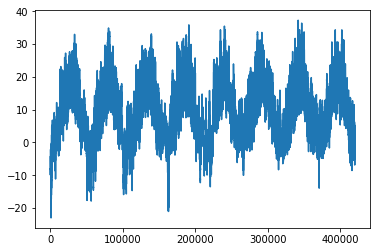

In [22]:
import matplotlib.pyplot as plt

temp = float_data[:, 1]  # temperature (celsius)
plt.plot(range(len(temp)), temp);

**Description of data**

There are 420,551 lines or points (each line is a timestep: a record of a date and 14 weather-related values) and 14 attributes.

In [11]:
float_data.shape

(420551, 14)

Here is a more narrow plot of the first 10 days of temperature data.
Because the data is recorded every 10 minutes, you get 144 data points per day:

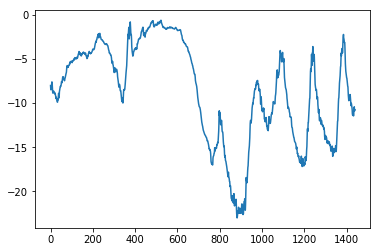

In [24]:
plt.plot(range(1440), temp[:1440]);

**Preparing the data**
The exact formulation of the problem will be as follows: Given data going as far back as `lookback` timesteps (a timestep is 10 minutes) and sampled every `steps` timesteps, can you predict the temperature in `delay` timesteps? You will use the following parameter values:

- `steps = 6` : Observations will be sampled at one data point per hour.
- `lookback = 720`: Observations will go back 5 days (`24*6*5=720`).
- `delay = 144`: Targets will be 24 hours in the future.


In other words, we use 5 days of data sampling data every .. (`lookback = 720`, `step=`). This gives us .. samples for predicting

To get started, you need to do two things:

- Preprocess the data (adjust scales)...
- Write a Python generator...

You will preprocess the data by substracting the mean of each timeseries and dividing by the standard deviation. You are going to use the first 200,000 timesteps as trainig data, so compute the mean and standard deviation only on this fraction of the data.

In [25]:
original_data = float_data.copy()

In [34]:
# Listing 6.32 Normalizing the data (compute mean, apply, compute std, apply)

tdata1 = original_data.copy()

size = 200000
mean = tdata1[:size].mean(axis=0)
tdata1 -= mean
std = tdata1[:size].std(axis=0)
tdata1 /= std

In [31]:
# Listing 6.32 Normalizing the data (compute mean, std, then apply)
 
tdata2 = original_data.copy()

size = 200000
mean = tdata2[:size].mean(axis=0)
std = tdata2[:size].std(axis=0)
tdata2 -= mean
tdata2 /= std

Parece que no hay diferencia entre ambos enfoques.

In [32]:
print(tdata1.mean(axis=0))
print(tdata2.mean(axis=0))

[ 0.03849063  0.04211222  0.03869325  0.07079503  0.03910971  0.02513871
  0.05640685 -0.00898814  0.05522002  0.05527035 -0.03416305 -0.29204804
 -0.22008832 -0.01701005]
[ 0.03849063  0.04211222  0.03869325  0.07079503  0.03910971  0.02513871
  0.05640685 -0.00898814  0.05522002  0.05527035 -0.03416305 -0.29204804
 -0.22008832 -0.01701005]


In [33]:
print(tdata1.std(axis=0))
print(tdata2.std(axis=0))

[ 0.98561829  0.95152285  0.94987508  0.93926979  0.984985    1.00648515
  0.99668365  1.01167287  0.99643111  0.99607864  0.94083901 42.590062
 29.61241253  1.00078925]
[ 0.98561829  0.95152285  0.94987508  0.93926979  0.984985    1.00648515
  0.99668365  1.01167287  0.99643111  0.99607864  0.94083901 42.590062
 29.61241253  1.00078925]


In [35]:
float_data = tdata1

In [4]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6, debug=False):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback
    
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(0, min(i + batch_size, max_index))
            i += len(rows)
         
        # debug
        #print("i        ", i)
        print("rows     ", rows)
        #print("len(rows)", len(rows))
        
        samples = np.zeros((len(rows), 
                           lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
            # debug
            if (rows[j] - lookback) == 0:
                print("rows[j] - lookback is 0 at j=%d" % j)
            
            # debug: print first 3 and last 3 sample ranges
            if j in (0, 1, 2, 99, 144, len(rows)-3, len(rows)-2, len(rows)-1):
                print("sample %3d range(%d, %d, %d)" % (j, rows[j] - lookback, rows[j], step))
                
            # debug: print indices of first and last sample
            if j in (0, 99, 144, len(rows)-1):
                print("rows[j] is rows[%d] = %d" % (j, rows[j]))
        
        yield samples, targets

Ahora, usemos el generador

In [5]:
lookback = 1440    # 10 dias * 24 hrs * 6 timesteps
step = 6
delay = 144
batch_size = 128

lookback = 144     # 1 dia  * 24 hrs * 6 timesteps
step = 6
delay = 72         # 0.5 dias * 24 hrs * 6 timesteps
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)

samples, targets = None, None

for i in range(1):
    samples, targets = next(train_gen)
    print(samples.shape)

rows      [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 

I don't know what is happening here, so let's break it down. First, remember the dimensions of `float_data`: There are 420551 records and 14 weather-related values. Thus, a record is a float vector with 14 weather-related values.

In [15]:
float_data.shape

(420551, 14)

Also, remember the shape expected for our model, described in p.36 in Chollet's book: `(samples, timesteps, features)`. Each batch of samples must follow that convention. In this case, the shape of `samples` is:

In [16]:
samples.shape

(272, 24, 14)

The last number is the number of features in `float_data`. The other two values were harder to grap, at least for me. Before explaining them, let's get the first sample:

**first sample**

In [32]:
first = samples[0, :, 1]    # samples[sample_id, all_timesteps, temperature]

Now, let's plot it:

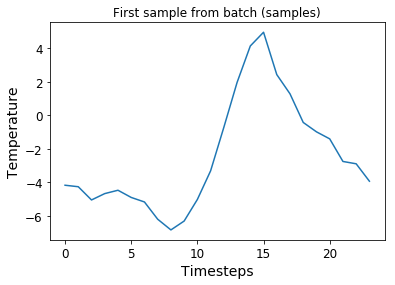

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(first)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("First sample from batch (samples)");

That sample corresponds to this code in the generator:

In [61]:
first_gen = float_data[range(-144, 0, 6), 1]   # [range(start,stop,step), temperature]

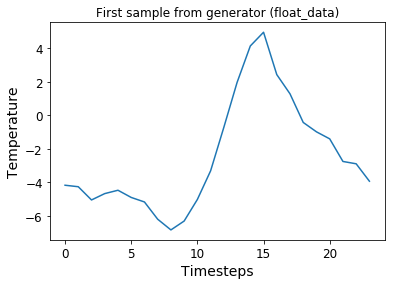

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(first_gen);
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("First sample from generator (float_data)");

**mid sample**


Now, let's check another the 100-th sample:

In [71]:
mid = samples[99, :, 1]    # samples[sample_id, all_timesteps, temperature]

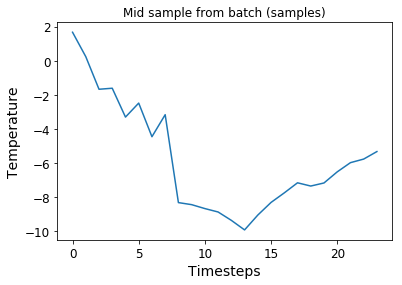

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mid)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Mid sample from batch (samples)");

Read the same sample from the dataset (like in the generator):

In [75]:
mid_gen = float_data[range(-45, 99, 6), 1]   # [range(start,stop,step), temperature]

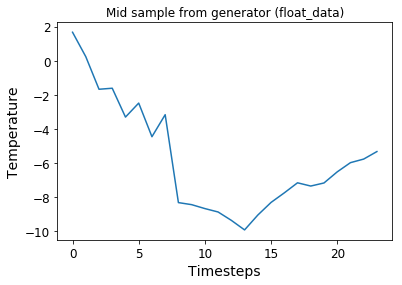

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mid)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Mid sample from generator (float_data)");

**last sample**

Finally, let's check the last sample in the batch

In [43]:
last = samples[-1, :, 1]    # samples[sample_id, all_timesteps, temperature]

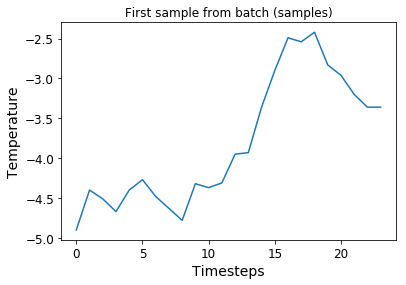

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(last)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Last sample from batch (samples)");

Now, read it from the dataset:

In [77]:
last_gen = float_data[range(127, 271, 6), 1]   # [start:stop:step, temperature]

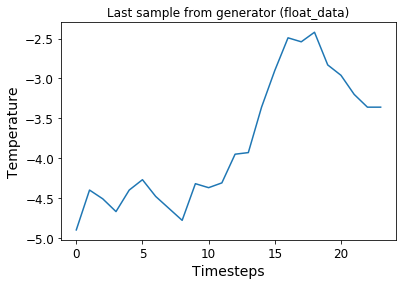

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(last_gen)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Last sample from generator (float_data)");

At this point, we have verified that the samples in `samples` can be obtained by reading `float_data`. Although that is not impressive, we know how the indexing works in the generator, that is, by using `float_data[range(start, stop, step)]`. Back to the log of the generator, we got these lines:

```
sample   0 range(-144, 0, 6)
sample   1 range(-143, 1, 6)
sample   2 range(-142, 2, 6)
sample  99 range(-45, 99, 6)
sample 269 range(125, 269, 6)
sample 270 range(126, 270, 6)
sample 271 range(127, 271, 6)
(272, 24, 14)
```

Notice that the generator is moving a sliding window over a set of indices.

- The first window covers `[-144, -143, ..., 0]`
- The next window covers `[-143, -142, ..., 1]`

and so on. Intuitively, the size of the window is `144`. However, remember that we do not use all the samples. Intead, we take samples considering multiples of `step=6`. That explains the size of each sample in the `samples` batch, `144//6 = 24`, which corresponds to the second dimension of `samples.shape = (272, 24, 14)`. You can think of `step` as the sampling rate of your batches, here `step=6` means that we save/take a sample every 6 timesteps. **So, `144//step` is efectively downsampling the number of samples from 144 to 24.**

Now, we can turn our attention to the first dimension.

Before explaining the meaining of the first dimension, let's check `targets`

In [5]:
targets.shape

(272,)

There are 272 scalar values. Given this, we use a vector of shape `(1, 24, 14)` (`1` vector with `24` timesteps regarding `14` different metrics) to predict a single scalar value (temperature).

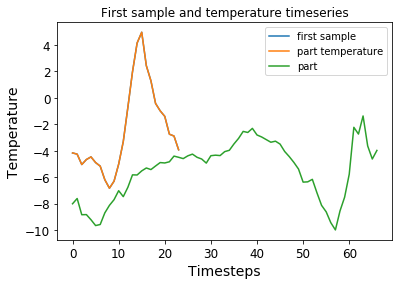

In [26]:
# plot first sample and a part of the temperature timeseries


# first sample (test instance)
first = samples[0, :, 1]    # samples[sample_id, all_timesteps, temperature]

# part of the temperature timeseries
n = float_data.shape[0]                   # number of instances (samples)
part = float_data[range(-144, 0, 6), 1]
part = float_data[n-144:n:6, 1]           # it is the same as float_data[range(-144, 0, 6), 1]

part2 = float_data[0:400:6, 1]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(first, label="first sample")
ax.plot(part, label="part temperature")
ax.plot(part2, label="part")


ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("First sample and temperature timeseries");
ax.legend();

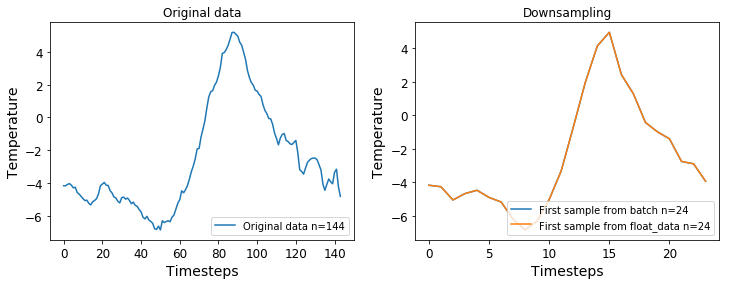

In [48]:
# downsampling

# first sample (test instance)
first = samples[0, :, 1]    # samples[sample_id, all_timesteps, temperature]

# first sample in the dataset (no downsampling)
n = float_data.shape[0]                 # number of instances (samples)
record = float_data[n-144:n, 1]           # it is the same as float_data[range(-144, 0, 6), 1]

# first sample in the dataset (downsampling)
step = 6
record2 = float_data[n-144:n:step, 1]       # it is the same as float_data[range(-144, 0, 6), 1]

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(record, label="Original data n=%d" % len(record))
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Temperature")
ax1.set_title("Original data");
ax1.legend(loc="lower right");

ax2.plot(first, label="First sample from batch n=%d" % len(first))
ax2.plot(record2, label="First sample from float_data n=%d" % len(record2))
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Temperature")
ax2.set_title("Downsampling");
ax2.legend(loc="lower right");

The previous figure compares the original sample (a vector with 144 values) before and after downsampling (24 values).

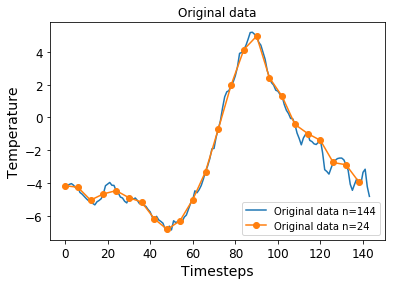

In [85]:
# alignment of samples
n = float_data.shape[0]                             # number of instances (samples)

# first sample in the batch (test instance)
first = samples[0, :, 1]                            # samples[sample_id, all_timesteps, temperature]

# first sample in the dataset (no downsampling)
record = float_data[range(-144, 0, 1), 1]           # dataset[range, temperature]          

# first sample in the dataset (downsampling)
step = 6
record_copy_y = float_data[range(-144, 0, step), 1] # dataset[range, temperature] 

# align downsampled vector with original vector
record_copy_x = np.arange(0, len(record), step)     # x = [0, step, step*2, ....]

# plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.plot(record, label="Original data n=%d" % len(record))
ax.plot(record_copy_x, record_copy_y, label="Original data n=%d" % len(record_copy_y), marker="o")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Original data");
ax.legend(loc="lower right");

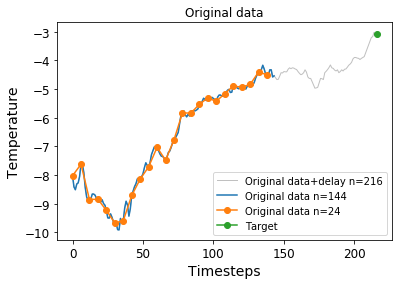

In [106]:
# alignment of samples
n = float_data.shape[0]                             # number of instances (samples)

# first sample in the batch (test instance)
first = samples[0, :, 1]                            # samples[sample_id, all_timesteps, temperature]

# first sample in the dataset (no downsampling)
record = float_data[range(0, 144, 1), 1]           # dataset[range, temperature]          

# first sample in the dataset (downsampling)
step = 6
record_copy_y = float_data[range(0, 144, step), 1] # dataset[range, temperature] 

# align downsampled vector with original vector
record_copy_x = np.arange(0, len(record), step)     # x = [0, step, step*2, ....]

# extended sample
delay = 72
record_delay = float_data[range(0, 144+delay, 1), 1]     # dataset[range, temperature]          

# target
target = float_data[144+delay][1]                        # [1] means "temperature attribue"
target_y = [target]                                      # convert to vector
target_x = [144+delay]

# plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.plot(record_delay, label="Original data+delay n=%d" % len(record_delay), c="#c0c0c0", lw=1)
ax.plot(record, label="Original data n=%d" % len(record))
ax.plot(record_copy_x, record_copy_y, label="Original data n=%d" % len(record_copy_y), marker="o")
ax.plot(target_x, target_y, label="Target", marker="o")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.set_title("Original data");
ax.legend(loc="lower right");

## Analyze sample 144

```
sample   0 range(-144, 0, 6)
rows[j] is rows[0] = 0
sample   1 range(-143, 1, 6)
sample   2 range(-142, 2, 6)
sample  99 range(-45, 99, 6)
rows[j] is rows[99] = 99
rows[j] - lookback is 0 at j=144
sample 144 range(0, 144, 6)
rows[j] is rows[144] = 144
sample 269 range(125, 269, 6)
sample 270 range(126, 270, 6)
sample 271 range(127, 271, 6)
rows[j] is rows[271] = 271
(272, 24, 14)
```



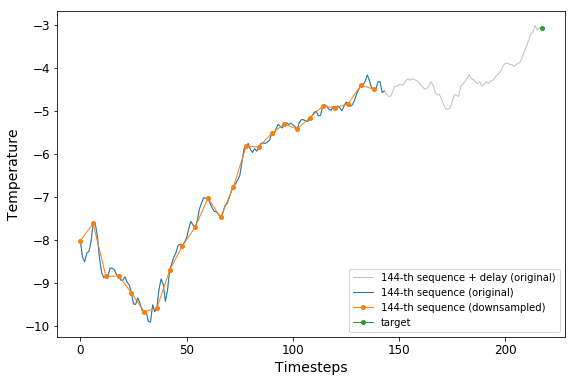

In [146]:
# downsampling

# 144-th original sequence
orig_sequence = float_data[0:144, 1]

# 144-th original sequence + delay
delay = 72
orig_sequence_delay = float_data[0:144+delay+1, 1]   # PREGUNTA: por que necesito +1?

# 144-th downsampled sequence
step = 6
sequence_y = samples[144, :, 1]    # samples[sample_id, all_timesteps, temperature]
sequence_x = np.arange(0, len(orig_sequence), step)

# target
target_y = [targets[144]]
target_x = [len(orig_sequence_delay)]

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)

ax.plot(orig_sequence_delay, label="144-th sequence + delay (original)", lw=1, c="#c0c0c0")
ax.plot(orig_sequence, label="144-th sequence (original)", lw=1)
ax.plot(sequence_x, sequence_y, label="144-th sequence (downsampled)", marker="o", lw=1, ms=4)
ax.plot(target_x, target_y, label="target", marker="o", lw=1, ms=4)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.legend(loc="lower right");

In [138]:
target_y  # no coincide con el ultimo valor de orig_sequence_delay

[-3.07]

In [145]:
orig_sequence_delay

array([-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91,
       -8.43, -8.76, -8.88, -8.85, -8.83, -8.66, -8.66, -8.7 , -8.81,
       -8.84, -8.94, -8.94, -8.86, -8.99, -9.05, -9.23, -9.49, -9.5 ,
       -9.35, -9.47, -9.63, -9.67, -9.68, -9.9 , -9.91, -9.51, -9.67,
       -9.59, -9.15, -8.91, -9.04, -9.43, -9.17, -8.71, -8.55, -8.4 ,
       -8.3 , -8.13, -8.1 , -8.14, -8.06, -7.95, -7.74, -7.57, -7.66,
       -7.71, -7.56, -7.29, -7.15, -7.02, -7.04, -7.03, -7.15, -7.26,
       -7.34, -7.35, -7.41, -7.48, -7.38, -7.21, -7.16, -7.03, -6.87,
       -6.77, -6.7 , -6.61, -6.51, -6.21, -5.89, -5.83, -5.76, -5.9 ,
       -5.97, -5.88, -5.94, -5.84, -5.76, -5.75, -5.76, -5.73, -5.69,
       -5.53, -5.57, -5.43, -5.32, -5.36, -5.4 , -5.31, -5.28, -5.32,
       -5.29, -5.33, -5.37, -5.43, -5.28, -5.21, -5.21, -5.24, -5.25,
       -5.16, -5.12, -5.04, -5.01, -5.12, -5.11, -4.9 , -4.86, -4.9 ,
       -4.97, -4.99, -4.9 , -4.93, -4.89, -4.93, -5.  , -4.9 , -4.8 ,
       -4.84, -4.9 ,

In [142]:
sequence_y

array([-8.02, -7.62, -8.85, -8.84, -9.23, -9.67, -9.59, -8.71, -8.14,
       -7.71, -7.03, -7.48, -6.77, -5.83, -5.84, -5.53, -5.31, -5.43,
       -5.16, -4.9 , -4.93, -4.84, -4.41, -4.5 ])

In [143]:
orig_sequence

array([-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91,
       -8.43, -8.76, -8.88, -8.85, -8.83, -8.66, -8.66, -8.7 , -8.81,
       -8.84, -8.94, -8.94, -8.86, -8.99, -9.05, -9.23, -9.49, -9.5 ,
       -9.35, -9.47, -9.63, -9.67, -9.68, -9.9 , -9.91, -9.51, -9.67,
       -9.59, -9.15, -8.91, -9.04, -9.43, -9.17, -8.71, -8.55, -8.4 ,
       -8.3 , -8.13, -8.1 , -8.14, -8.06, -7.95, -7.74, -7.57, -7.66,
       -7.71, -7.56, -7.29, -7.15, -7.02, -7.04, -7.03, -7.15, -7.26,
       -7.34, -7.35, -7.41, -7.48, -7.38, -7.21, -7.16, -7.03, -6.87,
       -6.77, -6.7 , -6.61, -6.51, -6.21, -5.89, -5.83, -5.76, -5.9 ,
       -5.97, -5.88, -5.94, -5.84, -5.76, -5.75, -5.76, -5.73, -5.69,
       -5.53, -5.57, -5.43, -5.32, -5.36, -5.4 , -5.31, -5.28, -5.32,
       -5.29, -5.33, -5.37, -5.43, -5.28, -5.21, -5.21, -5.24, -5.25,
       -5.16, -5.12, -5.04, -5.01, -5.12, -5.11, -4.9 , -4.86, -4.9 ,
       -4.97, -4.99, -4.9 , -4.93, -4.89, -4.93, -5.  , -4.9 , -4.8 ,
       -4.84, -4.9 ,

### More detailed explanation of the generator

I had a hard time understanding this piece of code:

```python
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback
    
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(0, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows),              # samples
                        lookback // step,           # timesteps (len of each sample)
                        data.shape[-1]              # features (there are 14: temperature, atm pression, etc)
                        ))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
```

Specifically, the last loop:

```
for j, row in enumerate(rows):
    indices = range(rows[j] - lookback, rows[j], step)
    samples[j] = data[indices]
    targets[j] = data[rows[j] + delay][1]
```


**Pendiente** Voy a continuar con el libro de geron para retomar el ejemplo de housing prices. Si quieres continuar desde aqui, esto es lo que debes recordar:

- El loop anterior es bastante clever, lo que hace Chollet es un indexado ciclico, ya que no comienza desde el primer row de `data`. Considera la siguiente figura:

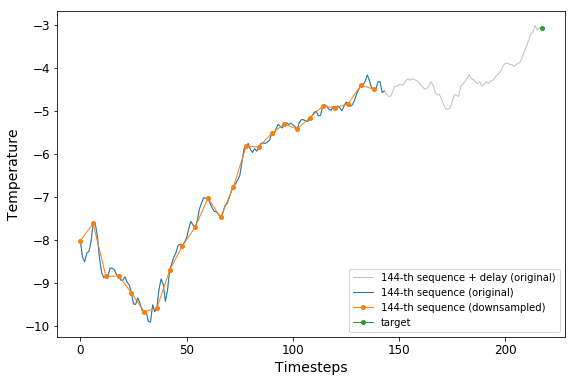

In [8]:
# downsampling

# 144-th original sequence
orig_sequence = float_data[0:144, 1]

# 144-th original sequence + delay
delay = 72
orig_sequence_delay = float_data[0:144+delay+1, 1]   # PREGUNTA: por que necesito +1?

# 144-th downsampled sequence
step = 6
sequence_y = samples[144, :, 1]    # samples[sample_id, all_timesteps, temperature]
sequence_x = np.arange(0, len(orig_sequence), step)

# target
target_y = [targets[144]]
target_x = [len(orig_sequence_delay)]

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)

ax.plot(orig_sequence_delay, label="144-th sequence + delay (original)", lw=1, c="#c0c0c0")
ax.plot(orig_sequence, label="144-th sequence (original)", lw=1)
ax.plot(sequence_x, sequence_y, label="144-th sequence (downsampled)", marker="o", lw=1, ms=4)
ax.plot(target_x, target_y, label="target", marker="o", lw=1, ms=4)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Temperature")
ax.legend(loc="lower right");

Nota que estamos graficando el sample/patron (test instance) 144 del batch `samples`. Sin embargo, ese mismo patron corresponde al *primer* sample de `float_data`, es decir, `float_data[:144, 1]`. ¿Por qué el patron 144 de `samples` es el primer patron de `float_data`? O mejor dicho ¿por qué el primer sample de `float_data` y de `samples` no es el mismo? Resulta que Chollet usa `range` para asignar los indices de los rows de `float_data` que se guardaran en `samples`.

Vamos a considerar un ejemplo pequeno en donde queremos 6 samples de `float_data` con un step de 10 y un delay de 20. Intuitivamente, leeriamos los siguientes rows de `float_data`. Para facilitar aun mas, vamos a considerar solo los dos primeros atributos de `float_data` con `mini_float_data = float_data[:, :2]`. Esta configuracion del problema de prediccion la podemos interpretar como **dada un timeseries, toma como entrada n=6 timesteps ordenados/adyacentes/secuenciales [t1, t2, ..., tn] y predice el timestep de la posicion tn + delay**

In [4]:
mini_float_data = float_data[:, :2]                     # first two attributes: p (mbar) and Temp (degrees)

delay = 20
indices = [0, 10, 20, 30, 40, 50]                       # 6 timesteps, muestreados de 10 en 10 (step=10)
first_sample = mini_float_data[indices]
first_target = mini_float_data[indices[-1] + delay, 1]  # es lo mismo que 50 + delay = 70

def print_vector(vec):
    pass

Podemos ver que el shape de `first_sample` es `(6, 2)`, es decir `(n_timesteps, n_attributes)`

In [40]:
first_sample.shape

(6, 2)

Si analizamos su contenido, podemos ver que las temperaturas son muy bajas, por debajo de 0 grados:

In [39]:
first_sample

array([[996.52,  -8.02],
       [996.62,  -8.76],
       [997.08,  -8.94],
       [997.43,  -9.67],
       [998.21,  -9.43],
       [999.44,  -7.95]])

**Cómo debemos interpretar esto?** En el bloque anterior:

```
indices = [0, 10, 20, 30, 40, 50]                    # 6 timesteps, muestreados de 10 en 10 (step=10)
first_sample = mini_float_data[indices]
```

estamos solicitando 4 samples de `mini_float_data`, es decir, `[0, 10, 20, 30, 40, 50]`. Podemos interpretar eso como *tomar 6 timesteps de una serie de tiempo*. Recuerda que `mini_float_data` contiene dos series de tiempo, una para presion y otra para temperatura:

```
mini_float_data[:, 0]    # presion
mini_float_data[:, 1]    # temperature
```

De modo que podemos graficar cada serie de tiempo:

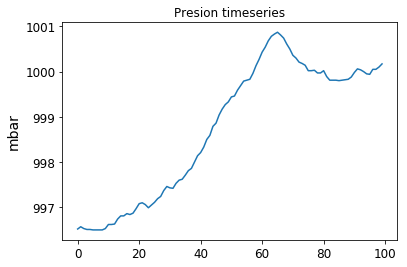

In [5]:
plt.plot(mini_float_data[:100, 0])   # first 100 timesteps of presion timeseries
plt.title("Presion timeseries");
plt.ylabel("mbar");

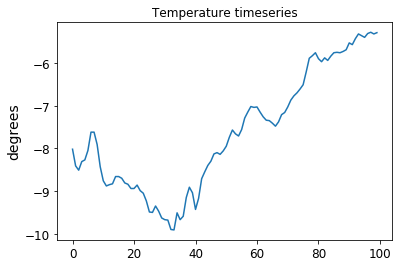

In [6]:
plt.plot(mini_float_data[:100, 1])   # first 100 timesteps of temperature timeseries
plt.title("Temperature timeseries");
plt.ylabel("degrees");

`mini_float_data[indices]` indica que tomaremos los timesteps de `indices`, en este caso, `indices = [0, 10, 20, 30, 40, 50]`. Dado que las muestras (o timesteps, creo que deberia formalizar mi nomenclatura) estan espaciadas con un `step` de 10 timesteps, debemos tener cuidado al graficar si es que queremos alinear `first_sample` con las muestras correspondientes de `mini_float_data`:

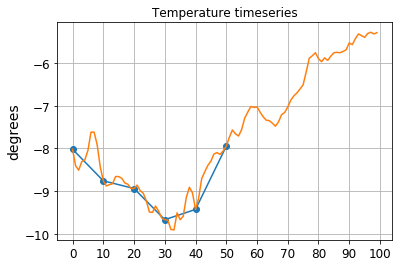

In [7]:
step = 10
data_y = first_sample[:, 1]                      # temperature data only
data_x = np.arange(0, len(data_y)*step, step)

plt.plot(data_x, data_y, marker="o")             # first sample in the batch
plt.plot(mini_float_data[:100, 1])               # first 100 timesteps of temperature timeseries
plt.title("Temperature timeseries");
plt.ylabel("degrees");

plt.xticks(np.arange(0, 101, 10))
plt.grid()

A partir de esta figura, podemos apreciar que usar un `step` de 10 equivale a submuestrear los datos originales. En este caso, tal submuestreo es algo agresivo, ya que no logra capturar el pico entre los timesteps 0 y 10. Podemos cambiar esto al reducir la frecuencia de muestreo, es decir, al reducir el valor de `steps`, por ejemplo, `steps=5`:

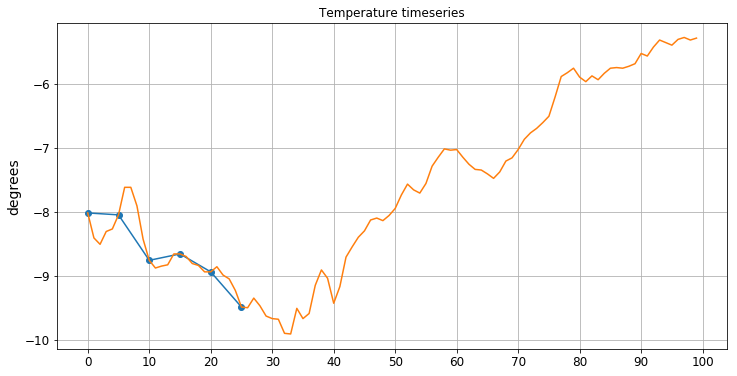

In [8]:
indices = [0, 5, 10, 15, 20, 25]                     # 6 timesteps, muestreados de 5 en 5 (step=5)
first_sample = mini_float_data[indices]

step = 5
data_y = first_sample[:, 1]                      # temperature data only
data_x = np.arange(0, len(data_y)*step, step)

plt.figure(figsize=(12, 6))
plt.plot(data_x, data_y, marker="o")             # first sample in the batch
plt.plot(mini_float_data[:100, 1])               # first 100 timesteps of temperature timeseries
plt.title("Temperature timeseries");
plt.ylabel("degrees");

plt.xticks(np.arange(0, 101, 10))
plt.grid()

Nota que ahora `first_sample` se aproxima mejor al segmento correspondiente de `mini_float_data`. Sin embargo, cubre una ventana menor (de 0 a 25) que al usar un `step=10` (de 0 a 50). Ahora, vamos a revisar `target` usando la configuracion inicial:

In [4]:
mini_float_data = float_data[:, :2]                     # first two attributes: p (mbar) and Temp (degrees)

delay = 20
indices = [0, 10, 20, 30, 40, 50]                       # 6 timesteps, muestreados de 10 en 10 (step=10)
first_sample = mini_float_data[indices]
first_target = mini_float_data[indices[-1] + delay, 1]  # es lo mismo que 50 + delay = 70

Aqui, el valor de `first_target` (ie, la temperatura que queremos predecir en el timestep 70) es `-7.03`

In [11]:
print(first_target)          # temperature
print(mini_float_data[70])   # [pression, temperature]

-7.03
[1000.36   -7.03]


Ahora, vamos a graficar la posicion del target:

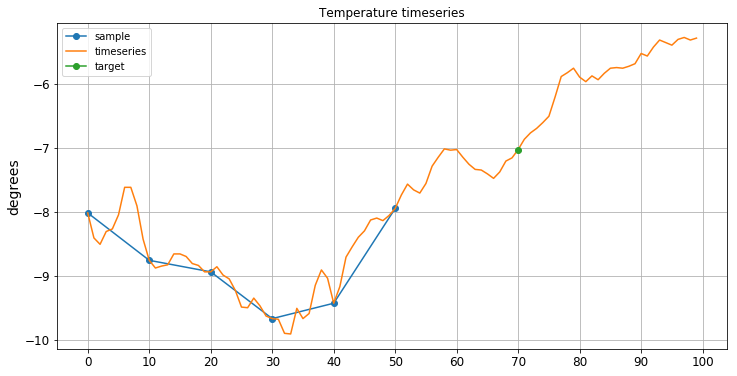

In [5]:
step = 10
data_y = first_sample[:, 1]                         # temperature data only
data_x = np.arange(0, len(data_y)*step, step)

data_target_x = data_x[-1] + delay                  # -1 means 'get last value in data_x'
data_target_y = first_target                        

data_target_x = [data_target_x]                     # convert to vector for plotting
data_target_y = [data_target_y]

plt.figure(figsize=(12, 6))
plt.plot(data_x, data_y, marker="o", label="sample")                  # first sample in the batch
plt.plot(mini_float_data[:100, 1], label="timeseries")                # first 100 timesteps of temperature timeseries
plt.plot(data_target_x, data_target_y, marker="o", label="target")
plt.title("Temperature timeseries");
plt.ylabel("degrees");

plt.xticks(np.arange(0, 101, 10))
plt.grid()
plt.legend();

La figura anterior ilustra el primer sample del batch (`sample` en la leyenda) y su target con respecto al timeseries completo. Ahora, vamos a ver el siguiente sample del batch, que contiene los timesteps [1, 11, 21, 31, 41, 51], es decir, es similar al sample anterior, pero con desfasado con un timestep.

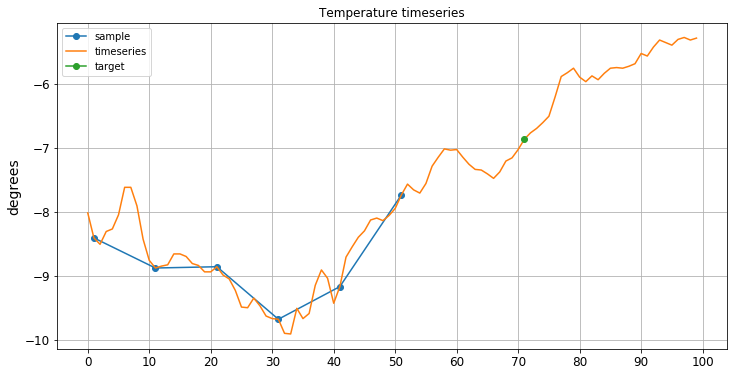

In [13]:
step = 10
delay = 20

indices = [1, 11, 21, 31, 41, 51]                       # 6 timesteps, muestreados de 10 en 10 (step=10)
next_sample = mini_float_data[indices]
next_target = mini_float_data[indices[-1] + delay, 1]   # es lo mismo que 51 + delay = 71

data_y = next_sample[:, 1]                              # temperature data only
data_x = np.arange(1, len(data_y)*step, step)           # IMPORTANT here the x values are [1, 11, ...., 51], not [0, 10, ..., 50]

data_target_x = data_x[-1] + delay                      # -1 means 'get last value in data_x'
data_target_y = next_target                        

data_target_x = [data_target_x]                         # convert to vector for plotting
data_target_y = [data_target_y]


plt.figure(figsize=(12, 6))
plt.plot(data_x, data_y, marker="o", label="sample")                  # first sample in the batch
plt.plot(mini_float_data[:100, 1], label="timeseries")                # first 100 timesteps of temperature timeseries
plt.plot(data_target_x, data_target_y, marker="o", label="target")
plt.title("Temperature timeseries");
plt.ylabel("degrees");

plt.xticks(np.arange(0, 101, 10))
plt.grid()
plt.legend();

Por simplicidad, vamos a definir una funcion para graficar los samples:

In [11]:
def plot(data_x, data_y, data_target_x, data_target_y):
    plt.figure(figsize=(12, 6))
    plt.plot(data_x, data_y, marker="o", label="sample")                  # first sample in the batch
    plt.plot(mini_float_data[:100, 1], label="timeseries")                # first 100 timesteps of temperature timeseries
    plt.plot(data_target_x, data_target_y, marker="o", label="target")
    plt.title("Temperature timeseries");
    plt.ylabel("degrees");

    plt.xticks(np.arange(0, 101, 10))
    plt.grid()
    plt.legend();

Ahora, vamos a graficar el mismo sample, pero ahora, vamos a definir indices con un range:

In [10]:
n = 6         # number of timesteps
start = 1
step = 10
stop = step*n
delay = 20

indices = range(start, stop ,step)                      # n timesteps, each one every step timesteps

next_sample = mini_float_data[indices]
next_target = mini_float_data[indices[-1] + delay, 1]

data_y = next_sample[:, 1]                              # temperature data only
data_x = np.arange(start, stop, step, dtype=int)        # it is the same as [start + step*i for i in range(n)]

data_target_x = data_x[-1] + delay                      # -1 means 'get last value in data_x'
data_target_y = next_target                        

data_target_x = [data_target_x]                         # convert to vector for plotting
data_target_y = [data_target_y]

plot(data_x, data_y, data_target_x, data_target_y)

print("target: %.4f" % next_target)
print("target: %.4f" % mini_float_data[71, 1])

NameError: name 'mini_float_data' is not defined

Lo que hay que recordar de este bloque es el indexado via `range`:

In [7]:
n = 6                                                   # number of timesteps
start = 0
step = 10
stop = step*n
delay = 20

indices = range(start, stop ,step)                      # n timesteps, each one every step timesteps

sample = mini_float_data[indices]
target = mini_float_data[indices[-1] + delay, 1]

Chollet usa `range` para seleccionar los timesteps de `float_data` y guardarlos en un batch. Ahora, vamos a crear un generador que haga algo similar al código de Chollet:

In [8]:
train_data = float_data[:200000, :]        # first 200,000 timesteps for training
val_data   = float_data[200000:300000, :]  # next 100,000 timesteps for validation
test_data  = float_data[300000:, :]        # remaining data for testing

print("train     ", train_data.shape[0])
print("validation", val_data.shape[0])
print("test      ", test_data.shape[0])

train      200000
validation 100000
test       120551


Usaremos un `batch_size` de `10` como ejemplo. La funcion `batch_generator` devolvera un batch `batch_samples` de shape `(batch_size, n_timesteps, n_features)` y `batch_targets` de shape `(batch_size, )`. Los valores de ``

In [9]:
mini_train_data = train_data[:17, :]

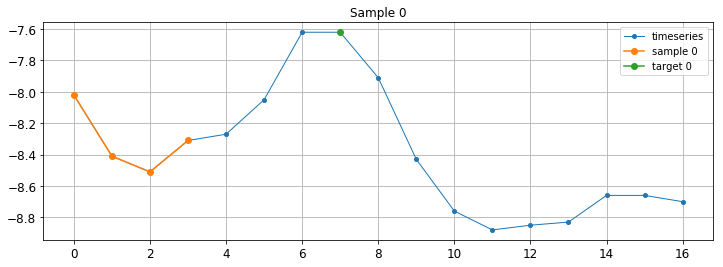

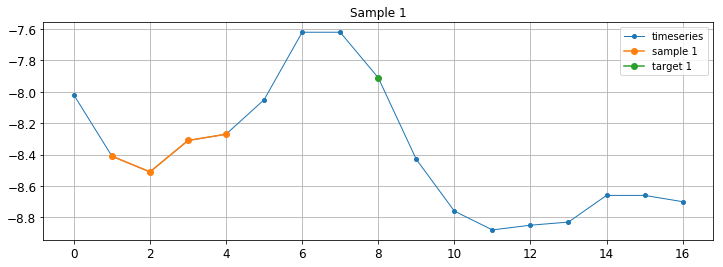

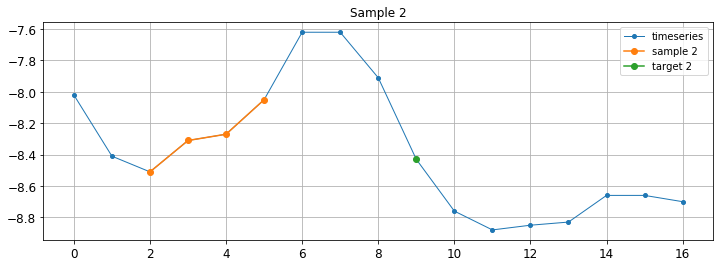

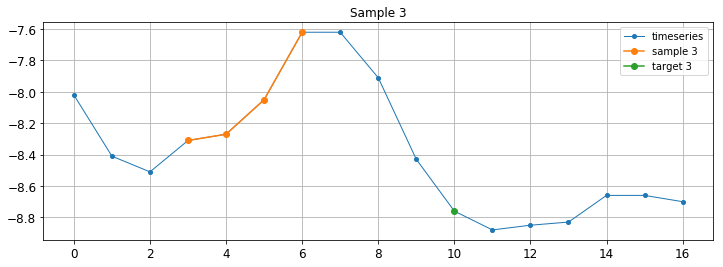

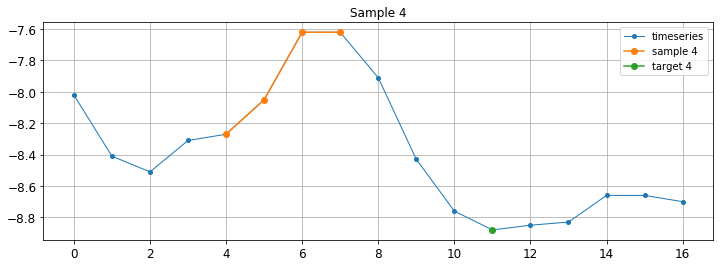

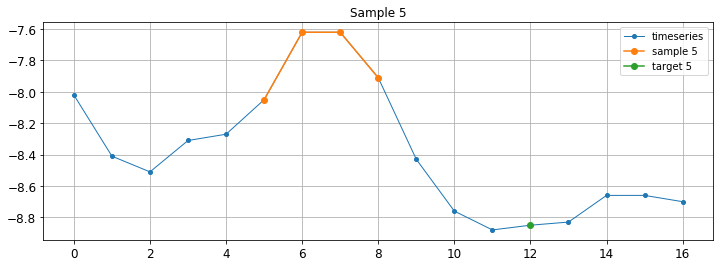

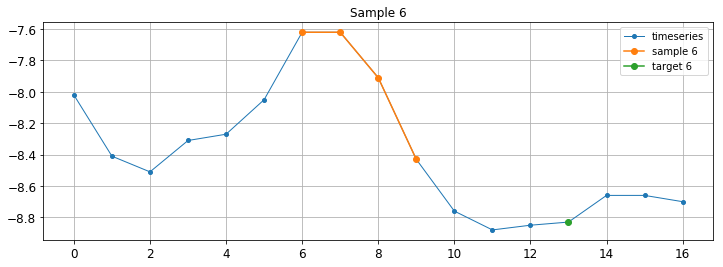

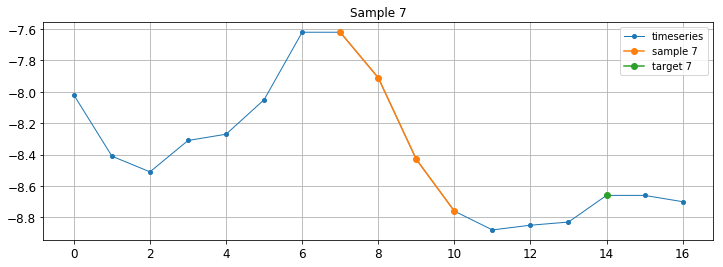

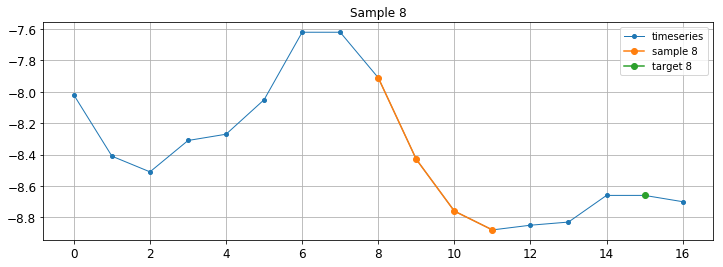

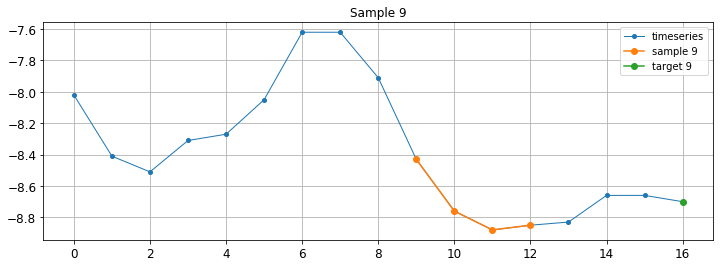

In [17]:
# alias
dataset = mini_train_data

# create a single batch
step = 1
lookback = 4
delay = 4

n_timesteps, n_features = mini_train_data.shape

frame_size = (lookback // step) + delay
limit = n_timesteps - frame_size + 1

batch_samples = np.zeros((limit,
                  lookback//step,
                  n_features))
batch_targets = np.zeros((limit, ))

for i in range(limit):
    start = i
    stop = start + lookback
    indices = range(start, stop, step)
    
    batch_samples[i] = dataset[indices, :]
    batch_targets[i] = dataset[indices[-1] + delay, 1]  # 1 means 'get temperature value only'
    
    # debug: plot i-th sample
    plt.figure(figsize=(12, 4))
    x = indices
    y = batch_samples[i, :, 1]
    plt.plot(dataset[:, 1], marker=".", label="timeseries", ms=8, lw=1)
    plt.plot(x, y, marker="o", label="sample %d" % i)
    
    target_x = [indices[-1] + delay]
    target_y = [batch_targets[i]]
    plt.plot(target_x, target_y, marker="o", label="target %d" % i)
    
    plt.title("Sample %d" % i)
    plt.legend()
    plt.grid();

Ahora, vamos a hacerlo como una funcion:

In [99]:
def batch_generator_v1(dataset, step=1, lookback=4, delay=4, debug_plot=False):

    n_timesteps, n_features = dataset.shape

    frame_size = (lookback // step) + delay
    limit = n_timesteps - frame_size + 1

    batch_samples = np.zeros((limit,
                      lookback//step,
                      n_features))
    batch_targets = np.zeros((limit, ))

    for i in range(limit):
        start = i
        stop = start + lookback
        indices = range(start, stop, step)

        batch_samples[i] = dataset[indices, :]
        batch_targets[i] = dataset[indices[-1] + delay, 1]  # 1 means 'get temperature value only'

        # debug: plot first and last samples
        if debug_plot and i in (0, limit-1):
            plt.figure(figsize=(12, 4))
            x = indices
            y = batch_samples[i, :, 1]
            plt.plot(dataset[:, 1], marker=".", label="timeseries", ms=8, lw=1)
            plt.plot(x, y, marker="o", label="sample %d" % i)

            target_x = [indices[-1] + delay]
            target_y = [batch_targets[i]]
            plt.plot(target_x, target_y, marker="o", label="target %d" % i)

            plt.title("Sample %d" % i)
            plt.legend()
            plt.grid();
            
    return batch_samples, batch_targets

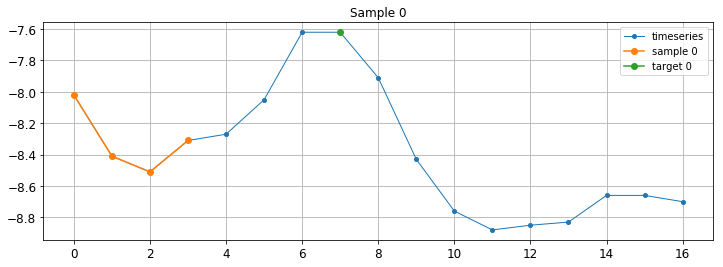

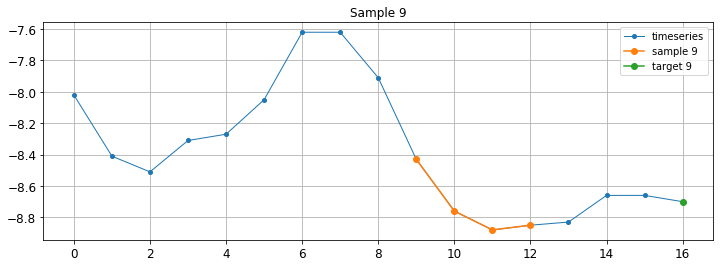

In [100]:
batch_samples, batch_targets = batch_generator_v1(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True)

Hasta este punto, tenemos una funcion que devuelve un solo batch con 10 samples de `dataset`. Ahora, vamos a agregar un parametro `batch_size` para indicar el numero de samples que queremos en el batch, por ejemplo, `batch_size=5` (debe generar dos batches):

In [108]:
def batch_generator_v2(dataset, batch_size=5, step=1, lookback=4, delay=4, debug_plot=False):

    n_timesteps, n_features = dataset.shape

    frame_size = (lookback // step) + delay
    limit = n_timesteps - frame_size + 1

    batch_samples = np.zeros((batch_size,      # v2: reemplazo limit por batch_size
                      lookback//step,
                      n_features))
    batch_targets = np.zeros((batch_size, ))   # v2: reemplazo limit por batch_size
 
    for i in range(batch_size):                # v2: reemplazo limit por batch_size
        start = i
        stop = start + lookback
        indices = range(start, stop, step)

        batch_samples[i] = dataset[indices, :]
        batch_targets[i] = dataset[indices[-1] + delay, 1]  # 1 means 'get temperature value only'

        # debug: plot first and last samples
        if debug_plot and i in (0, batch_size-1):  # v2: reemplazo limit por batch_size
            plt.figure(figsize=(12, 4))
            x = indices
            y = batch_samples[i, :, 1]
            plt.plot(dataset[:, 1], marker=".", label="timeseries", ms=8, lw=1)
            plt.plot(x, y, marker="o", label="sample %d" % i)

            target_x = [indices[-1] + delay]
            target_y = [batch_targets[i]]
            plt.plot(target_x, target_y, marker="o", label="target %d" % i)

            plt.title("Sample %d" % i)
            plt.xlabel("timestep")
            plt.ylabel("temperature")
            plt.legend()
            plt.grid();
            
    return batch_samples, batch_targets

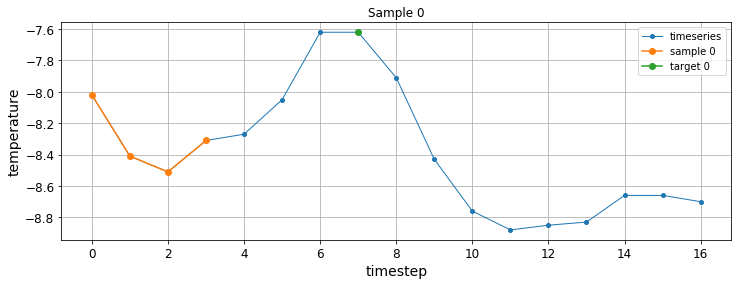

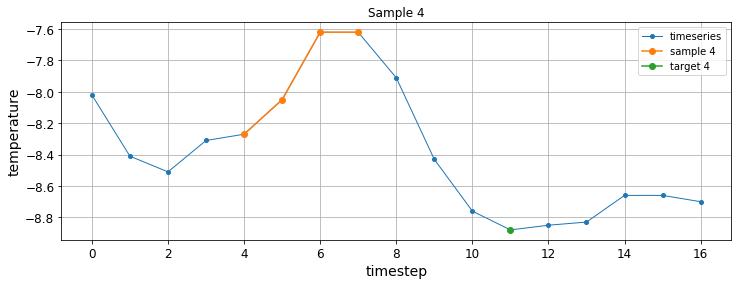

In [109]:
batch_samples, batch_targets = batch_generator_v2(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True)

Nota que basta con graficar el primer y ultimo batch para saber que se cubrio la region de `timeseries` que corresponde a `batch_size=5` samples: el primer sample empieza en `timestep=0` y el ultimo sample en `timestep=4`, por lo tanto, hay cinco samples, que inician en `t in [0, 1, 2, 3, 4]`.

Ahora, **cómo le hacemos para devolver el segundo batch?** Hay que cambiar el valor de `start`:


In [6]:
def batch_generator_v3(dataset, batch_size=5, step=1, lookback=4, delay=4, debug_plot=False, start_offset=0):

    n_timesteps, n_features = dataset.shape

    frame_size = (lookback // step) + delay
    limit = n_timesteps - frame_size + 1

    batch_samples = np.zeros((batch_size,      # v2: reemplazo limit por batch_size
                      lookback//step,
                      n_features))
    batch_targets = np.zeros((batch_size, ))   # v2: reemplazo limit por batch_size
 
    #start_offset = 0                           # v3: agregar offset en start
 
    for i in range(batch_size):                # v2: reemplazo limit por batch_size
        start = i + start_offset               # v3: agregar offset en start
        stop = start + lookback
        indices = range(start, stop, step)

        batch_samples[i] = dataset[indices, :]
        batch_targets[i] = dataset[indices[-1] + delay, 1]  # 1 means 'get temperature value only'

        
        
        # debug: plot first and last samples
        if debug_plot and i in (0, batch_size-1):  # v2: reemplazo limit por batch_size
            plt.figure(figsize=(12, 4))
            x = indices
            y = batch_samples[i, :, 1]
            plt.plot(dataset[:, 1], marker=".", label="timeseries", ms=8, lw=1)
            plt.plot(x, y, marker="o", label="sample %d" % i)

            target_x = [indices[-1] + delay]
            target_y = [batch_targets[i]]
            plt.plot(target_x, target_y, marker="o", label="target %d" % i)

            plt.title("Sample %d" % i)
            plt.xlabel("timestep")
            plt.ylabel("temperature")
            plt.legend()
            plt.grid();
            
    return batch_samples, batch_targets

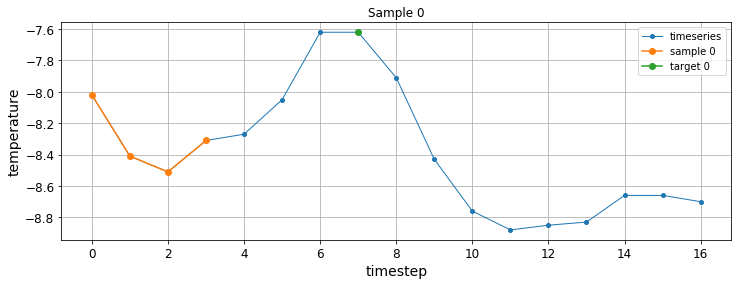

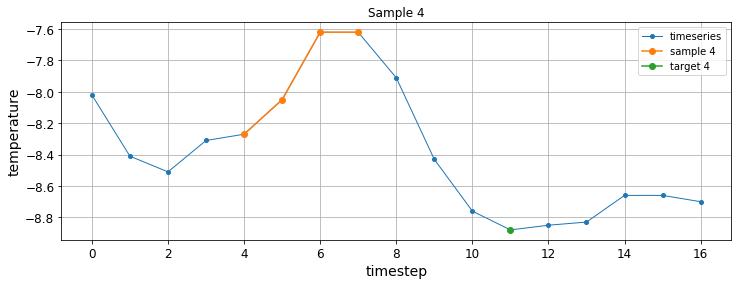

In [111]:
batch_samples, batch_targets = batch_generator_v3(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True, start_offset=0)

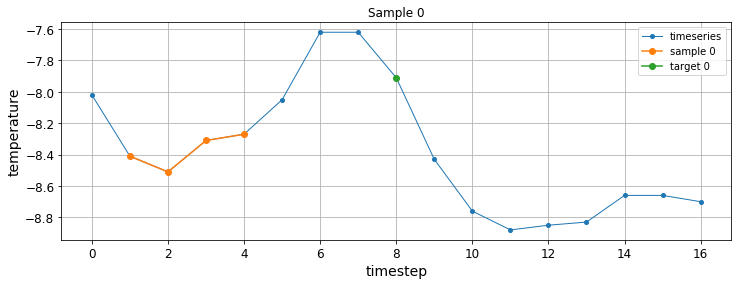

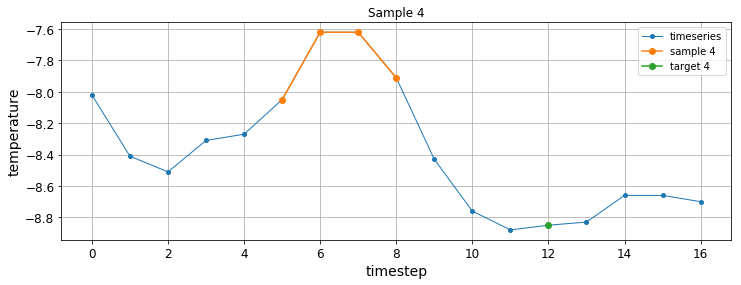

In [112]:
batch_samples, batch_targets = batch_generator_v3(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True, start_offset=1)

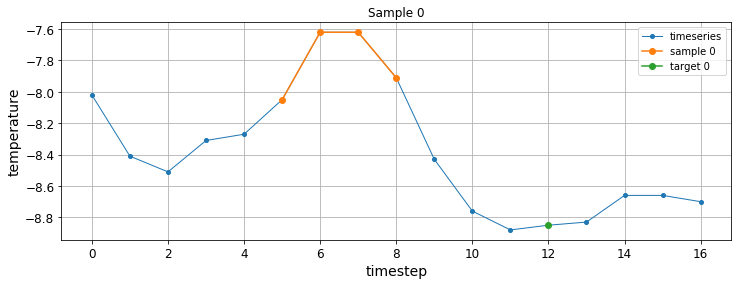

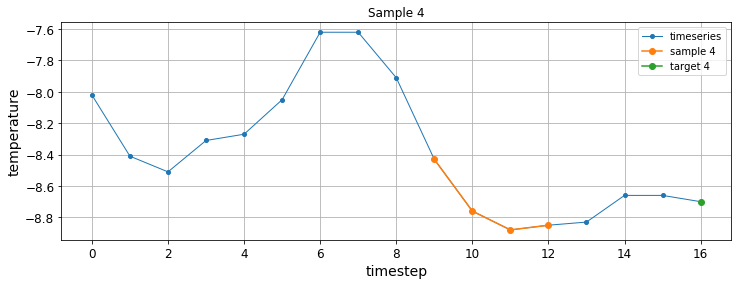

In [19]:
batch_samples, batch_targets = batch_generator_v3(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True, start_offset=5)

Parece que funciona. Nota que el segundo batch comienza en `timestep=1`, como se indica en `start_offset=1`. En el tercer batch, el primer sample comienza en `timestep=5`, como se indica en `start_offset=5`. Nota ademas que es el ultimo batch permitido, ya que el target del ultimo sample corresponde al ultimo valor de `timeseries`. Ahora, vamos a agregar una validacion en caso de que `start_offset` no este en el rango permitido:

In [22]:
def batch_generator_v4(dataset, batch_size=5, step=1, lookback=4, delay=4, debug_plot=False, start_offset=0):

    n_timesteps, n_features = dataset.shape

    frame_size = (lookback // step) + delay
    limit = n_timesteps - frame_size + 1
    
    print("limit", limit)
    print("frame_size", frame_size)

    batch_samples = np.zeros((batch_size,      # v2: reemplazo limit por batch_size
                      lookback//step,
                      n_features))
    batch_targets = np.zeros((batch_size, ))   # v2: reemplazo limit por batch_size
 
    #if start_offset > limit:

    #start_offset = 0                           # v3: agregar offset en start
 
    for i in range(batch_size):                # v2: reemplazo limit por batch_size
        start = i + start_offset               # v3: agregar offset en start
        stop = start + lookback
        indices = range(start, stop, step)

        batch_samples[i] = dataset[indices, :]
        batch_targets[i] = dataset[indices[-1] + delay, 1]  # 1 means 'get temperature value only'

        
        
        # debug: plot first and last samples
        if debug_plot and i in (0, batch_size-1):  # v2: reemplazo limit por batch_size
            plt.figure(figsize=(12, 4))
            x = indices
            y = batch_samples[i, :, 1]
            plt.plot(dataset[:, 1], marker=".", label="timeseries", ms=8, lw=1)
            plt.plot(x, y, marker="o", label="sample %d" % i)

            target_x = [indices[-1] + delay]
            target_y = [batch_targets[i]]
            plt.plot(target_x, target_y, marker="o", label="target %d" % i)

            plt.title("Sample %d" % i)
            plt.xlabel("timestep")
            plt.ylabel("temperature")
            plt.legend()
            plt.grid();
            
    return batch_samples, batch_targets

limit 10
frame_size 8


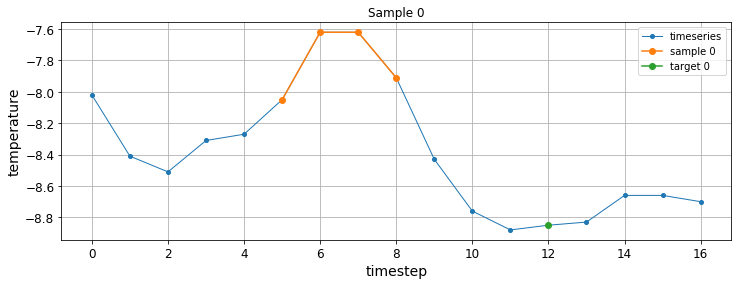

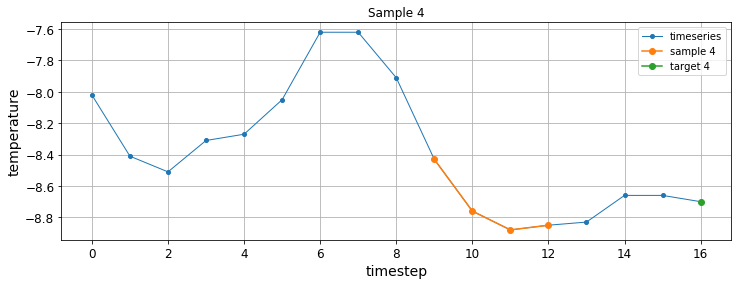

In [23]:
batch_samples, batch_targets = batch_generator_v4(mini_train_data, step=1, lookback=4, delay=4, debug_plot=True, start_offset=5)

Vamos a volver a intentar con el generator de Chollet:

In [23]:
def generator_chollet(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6, debug=False):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback
    
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(0, min(i + batch_size, max_index))
            i += len(rows)
         
        # debug
        print("rows    ", rows)
        
        samples = np.zeros((len(rows), 
                           lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
            # debug
            if (rows[j] - lookback) == 0:
                print("rows[j] - lookback is 0 at j=%d" % j)
            
            # debug: print first 3 and last 3 sample ranges
            if j in (0, 1, 2, 99, 144, len(rows)-3, len(rows)-2, len(rows)-1):
                print("sample %3d range(%d, %d, %d)" % (j, rows[j] - lookback, rows[j], step))
                
            # debug: print indices of first and last sample
            if j in (0, 99, 144, len(rows)-1):
                print("rows[j] is rows[%d] = %d" % (j, rows[j]))
        
        yield samples, targets

In [25]:
data = train_data[:20, :]
lookback = 4
delay = 4
min_index = 0
max_index = data.shape[0]
shuffle = False
batch_size = 4
step = 1
debug = True

for i in range(1):
    print("--- batch ", i, "---")
    batch_samples, batch_targets = next(generator_chollet(data, lookback, delay, min_index, max_index, shuffle, batch_size, step, debug))

--- batch  0 ---
rows     [0 1 2 3 4 5 6 7]
sample   0 range(-4, 0, 1)
rows[j] is rows[0] = 0
sample   1 range(-3, 1, 1)
sample   2 range(-2, 2, 1)
rows[j] - lookback is 0 at j=4
sample   5 range(1, 5, 1)
sample   6 range(2, 6, 1)
sample   7 range(3, 7, 1)
rows[j] is rows[7] = 7


In [26]:
batch_samples.shape

(8, 4, 14)

Me gusta el siguiente codigo, es simple, pero aun falta manejar el step (ie el sampling rate). Sin importar el valor de `step`, debe hacer `lookback` timesteps en el batch

In [ ]:
rows = [0, 1, ..., 12]      # available rows para tomar como start

if shuffle:
    rows = np.random.permutation(rows)   # asi de simple

start = 0
end = start + batch_size
batch_id = 0

while True:
    
    indices = rows[start:end]                 # aun falta usar step, no puedo ponerlo aqui porque reduciria el numero de timesteps en el batch!
    batch_samples[batch_id] = data[indices, :]
    batch_targets[batch_id] = data[indices[-1] + delay, 1]
    
    # next batch
    start = end
    end = start + batch_size
    batch_id += 1
    
    yield batch_samples, batch_targets
    

In [ ]:
o este codigo

In [ ]:
rows = [0, 1, ..., 12]      # available rows para tomar como start (no uses step aqui) este arreglo solo te dice en que rows de data puedes muestrear
                            # sin exceder el delay
if shuffle:
    rows = np.random.permutation(rows)   # asi de simple

start = 0
end = start + batch_size
batch_id = 0

while True:
    
    indices = rows[start:end]                 # aun falta usar step, no puedo ponerlo aqui porque reduciria el numero de timesteps en el batch!
    batch_samples[batch_id] = data[indices, :]
    batch_targets[batch_id] = data[indices[-1] + delay, 1]
    
    # next batch
    start = end
    end = start + batch_size
    batch_id += 1
    
    yield batch_samples, batch_targets
    

## Apendix C

This is what I think the author is doing. First, divdide the proportions (sampled/whole dataset) like this `proportions["stratified"] / proportions["overall"]`. Interpret this as `obtained_proportion/expected_proportion`.


```
proportions["random"] / proportions["overall"]

1    1.009732
2    1.017323
3    1.022664
4    0.949437
5    0.956816
dtype: float64
```


Then, convert that value into pertentage by multiplying by 100:

```
100 * proportions["random"] / proportions["overall"]

1    100.973236
2    101.732260
3    102.266446
4     94.943666
5     95.681626
dtype: float64
```

Finally, since we are talking about error, subtract 100. Interpret as follows: `100 * obtained_proportion/expected_proportion` returns a percentage of the obtained proportion. Ideally, such a percentage must be 100. In order to measure the error, we compute the difference between the obtained percentage (`100 * obtained_proportion/expected_proportion`) and the expected percentage (100).

In [ ]:
proportions["random"] / proportions["overall"]

In [ ]:
100 * proportions["random"] / proportions["overall"]